# Дипломная работа. E-commerce — Выявление профилей потребления

Проведём аналитическую работу для интернет-магазина товаров для дома «Пока все ещё тут». Исследование проводится для создания персонализированных предложений для покупателей (таргетинг). Ближайшие задачи — выявление профилей покупателей, а также их сегментация и анализ. Попробуем понять, какие у нас клиенты с точки зрения покупательских паттернов: сколько денег тратят на заказы, как часто покупают, какие категории товаров предпочитают, какой средний чек и так далее. 

На основе полученных данных и графиков будет создан дашборд. 

## Материалы

### Презентация

Презентацию о проведённом исследовании можно посмотреть и прокомментировать [здесь](https://drive.google.com/file/d/1MT94-xIy8R5A_FJDqQZjbqcNVCEbGcVZ/view?usp=sharing).

### Дашборд

По итогам исследования создан дашборд. Его структура:
- диаграмма, отображающая сумму покупок по дням;
- гистограмма, отображающая распределение заказов по сумме;
- фильтр дашборда по дате совершения покупки.

Открыть дашборд можно [здесь](https://public.tableau.com/views/Diplom_YP/).

## Декомпозиция

### Задача исследования

Задача нашего исследования — **сегментировать покупателей по профилю потребления**. Опишем каждого клиента с помощью набора атрибутов: как часто покупают, какие группы товаров предпочитают, какой средний чек заказов и т.д. 

Это необходимо для того, чтобы разработать более персонализированные предложения для покупателей.

### План действий

Для реализации нашей задачи мы:

1. **[Проведём предварительную обработку данных:](#pred)**
    * [исследуем пропущенные значения;](#propusk)
    * [исследуем соответствие колонок типам данных и проверим корректность наименований колонок (в случае необходимости переименуем их);](#type)
    * [исследуем наличие явных и неявных дубликатов;](#duble)
    * [при необходимости добавим дополнительные столбцы данных;](#newcolumn)
    * [определим дату начала и конца сбора данных;](#dates)
    * [проверим наличие аномальных значений;](#anormal)
    * [проверим ошибки в данных.](#mistake)
    

2. **[Проведём исследовательский анализ данных:](#issled)**
    * [посмотрим общее количество покупателей и динамику количества покупателей по дням](#countusers)
    * [посмотрим динамику заказов по дням](#countorders)
    * [посмотрим динамику сумм выкупа](#avsum)
    * [посчитаем средний чек на покупателя](#avcheck)
    * [посчитаем сумму выкупа на каждого покупателя, LTV](#ltv)
    * [разобьём товары на категории](#categorygoods)
        * [по количеству заказов](#countordersgoods)
        * [по ценам](#pricegoodscategory)
        * [по частоте покупок](#freqgoodscategory)
        * [по назначению товара](#purposegoodscategory)
    * [посчитаем среднее количество покупаемых товаров для каждой категории товара](#avquantitycategory)
    * [посмотрим топ-3 самых продаваемых категорий товаров](#topcategory)


3. **[Сегментируем покупателей на основе истории их покупок:](#segmentation)**
    * [RFM-анализ](#rfm)


4. **[Сформулируем и проверим статистические гипотезы](#hypotheses)**


5. **[Общий вывод](#generalconclusion)**

## Описание данных

В нашем распоряжении есть датасет `ecom_dataset_upd.csv`, который описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут». 

В нём содержится следующая информация: 
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Предварительная обработка данных  <a id='pred'></a>

Подготовим нашу базу данных к анализу. Необходимо проверить, насколько корректны и адекватны данные в ней, насколько сама база удобна для работы. Загрузим базу данных, исследуем пропуски, дубли, типы данных и т.д.

In [2]:
# для начала загрузим необходимые библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import datetime as dt


In [3]:
# загрузим необходимую базу данных

google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
ecom = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )

display(ecom.head(2))

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0


**Мы загрузили необходимые библиотеки и загрузили саму базу данных. Можно приступать к работе.**

### Исследуем пропущенные значения   <a id='propusk'></a>

Если есть пропущенные значения, нам будут недоступны многие операции с данными. Кроме того, показатели будут искажены, сделаем неверные вывыоды. Выясним, есть ли пропуски в нашей базе. 

In [4]:
# проверим, есть ли в нашей базе данных пропуски

ecom.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

**Пропущенных значений нет, все поля заполняются, можем двигаться дальше.**

### Соответствие колонок типам данных. Проверка корректности наименований столбцов     <a id='type'></a>

Удостоверимся в том, что тип данных столбца соответствует типу самих данных. При необходимости изменим тип данных на корректный.

In [5]:
# получим общую информацию о датафрейме, посмотрим типы данных и названия столбцов

ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [6]:
# приведём столбец date к соответствующему типу данных 

ecom['date'] = pd.to_datetime(ecom['date'], format="%Y%m%d%H")
ecom.head(2)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0


In [7]:
# мы видим, что в столбце date на самом деле дата и время, изменим название столбца

ecom.rename(columns = {'date':'datetime'}, inplace = True )
display(ecom.head(2))

,datetime,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0


**Мы изменили тип данных и название у столбца с датой и временем заказа. Всё остальное в порядке, двигаемся дальше.**

### Наличие явных и неявных дубликатов <a id='duble'></a>

Проанализируем базу данных на наличие явных или неявных дубликатов — они могут сильно искажать информацию, и сделать весь последующий анализ бессмысленным.

In [8]:
# проверим датафрейм на наличие явных дубликатов
ecom.duplicated().sum()

0

In [9]:
# явных дублей нет, поищем неявные
ecom[ecom.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price'])].head(5)

,datetime,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0


В базе данных есть неявные дубликаты. Главная проблема в том, что у одного номера заказа может быть разное дата-время, а один и тот же товар может быть добавлен в заказ в одном и том же количестве, но с разницей во времени (а не сразу в нужном количестве), при этом цена товара одинаковая. При этом мы не знаем, была ли транзакция по каждому конкретному заказу.

In [10]:
# посмотрим, сколько таких дублей у нас есть

print ('Всего дублирующихся заказов: ', ecom.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price']).sum())
print ('Доля дублей в общем количестве заказов: ', \
       round(ecom.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price'])\
             .sum()/ecom['order_id'].count()*100, 2))

Всего дублирующихся заказов:  1864
Доля дублей в общем количестве заказов:  24.94


Доля дублей — 24.94%. Отбросив их, мы потеряем четверть данных.

Очень похоже на то, что данные записи создавались при каждом заходе пользователя к нам. В противном случае либо менялось бы количество товаров, либо менялся бы номер заказа. 

Удалим эти дубли, чтобы они не накручивали нам статистику востребованности тех или иных товаров.

In [11]:
# оставим последнюю дату и время как наиболее вероятное время совершения заказа
ecom = ecom.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep='last')

print ('Осталось дублирующихся заказов: ', \
       ecom.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price']).sum())
print()
print (ecom.info())

Осталось дублирующихся заказов:  0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     5610 non-null   datetime64[ns]
 1   customer_id  5610 non-null   object        
 2   order_id     5610 non-null   int64         
 3   product      5610 non-null   object        
 4   quantity     5610 non-null   int64         
 5   price        5610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 306.8+ KB
None


**Мы проверили базу данных на наличие дублирующейся информации, обнаружили множество неявных дублей (появились из-за перезаписи одних и те же заказов при каждом новом заходе пользователя) и удалили их. Данные сократились на 1864 строчки.**

### Добавление дополнительных столбцов <a id='newcolumn'></a>

Для удобства анализа заранее добавим необходимые столбцы: сумму заказа, дату, день, неделю и месяц заказа.

In [12]:
# добавим столбец с суммой заказа
ecom['amount'] = ecom['quantity'] * ecom['price']

# посмотрим результат на заказах с более чем одним товаром
display(ecom.query('quantity != 1').head(2))

,datetime,customer_id,order_id,product,quantity,price,amount
10,2018-10-01 11:00:00,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,Вешалка для брюк металлическая с резиновым пок...,10,82.0,820.0
13,2018-10-01 15:00:00,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,Крючок одежный 2-х рожковый серый металлик с п...,96,38.0,3648.0


In [13]:
# добавим столбцы с днём недели, месяцем и годом

ecom['date'] = pd.to_datetime(ecom['datetime']).dt.date
ecom['day'] = ecom['datetime'].dt.isocalendar().day
ecom['month'] = pd.DatetimeIndex(ecom['date']).month
ecom['year'] = pd.DatetimeIndex(ecom['date']).year

display(ecom.head(2))

,datetime,customer_id,order_id,product,quantity,price,amount,date,day,month,year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,1,10,2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,1,10,2018


In [14]:
# изменим порядок столбцов, чтобы информация о дате шла подряд
ecom = ecom[['customer_id', 'order_id', 'product', 'quantity', 'price', 'amount', 'datetime', 'date', 'day', 'month', 'year']]
display(ecom.head(2))

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,2018-10-01,1,10,2018
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,2018-10-01,1,10,2018


**Мы добавили новые столбцы: суммы по товару и деталей даты. Теперь работать с датафреймом будет удобнее.**

### Определим дату начала и конца сбора данных <a id='dates'></a>

Проверим, с какого по какое число есть данные в нашей базе данных. 

In [15]:
print ('Дата начала сбора данных: ', ecom['date'].min())
print ('Дата конца сбора данных: ', ecom['date'].max())

Дата начала сбора данных:  2018-10-01
Дата конца сбора данных:  2020-01-31


**Данные собирались 1 октября 2018 года по 31 января 2020 года включительно.**

### Наличие аномальных значений <a id='anomal'></a>

Проверим, есть ли у нас явные аномалии — например, отрицательное число заказов или цен.

In [16]:
# выведем статистическую информацию о датафрейме
ecom.describe()

,order_id,quantity,price,amount,day,month,year
count,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000
mean,55982.134403,2.608556,530.084507,828.666384,3.662923,6.668449,2018.829768
std,32373.436923,16.420261,971.758307,9152.331937,1.967538,3.599125,0.487027
min,12624.000000,1.000000,9.000000,9.000000,1.000000,1.000000,2018.000000
25%,14815.000000,1.000000,90.000000,120.000000,2.000000,4.000000,2019.000000
50%,69225.500000,1.000000,150.000000,194.000000,4.000000,6.000000,2019.000000
75%,71927.500000,1.000000,524.000000,734.000000,5.000000,10.000000,2019.000000
max,112789.000000,1000.000000,14917.000000,675000.000000,7.000000,12.000000,2020.000000


**Каких-то явных аномалий не обнаружено. Можем переходить к исследовательскому анализу данных.**

### Поиск ошибок в данных  <a id='mistake'></a>

Проверим соответствие базы данных бизнес-правилам: один заказ = одна дата, один заказ = один пользователь.

In [17]:
# для начала зафиксируем число транзакций
len(ecom)

5610

Запомним, что до начала исправления ошибок данных у нас 5610 строк с транзакциями.

In [18]:
oneorder_oneuser = ecom.groupby('order_id', as_index=False).agg({'customer_id':'nunique'})\
    .sort_values('customer_id', ascending=False).query('customer_id > 1')
oneorder_oneuser.count()

order_id       29
customer_id    29
dtype: int64

Мы обнаружили 29 заказов, которым соответствует более 1 пользователя. 

In [19]:
ecom.query('order_id in @oneorder_oneuser.order_id').head(6)

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year
512,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0,374.0,2018-10-28 22:00:00,2018-10-28,7,10,2018
538,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0,374.0,2018-10-30 21:00:00,2018-10-30,2,10,2018
1154,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,164.0,2018-12-10 12:00:00,2018-12-10,1,12,2018
1160,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,164.0,2018-12-10 16:00:00,2018-12-10,1,12,2018
1196,70d60304-4b3c-4f34-9430-1872ec6e6309,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0,974.0,2018-12-13 19:00:00,2018-12-13,4,12,2018
1209,22e4d79f-3613-4c22-8b01-7f880120bf5a,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0,974.0,2018-12-15 07:00:00,2018-12-15,6,12,2018


Один и тот же товар в одном и том же количестве, но разные даты (близкие между собой) и устройства. Очень похоже на то, что пользователь принимал решение о покупке, посещая магазин с разных устройств (логинов), либо используя разные способы авторизации (по почте и по телефону, например).

Скорее всего заказ в итоге был сделан в конце. Эту информацию стоит уточнить у заказчика исследования. А пока отбросим дубли, оставим только наиболее свежую информацию.

In [20]:
# посмотрим, сколько данных мы потеряем

ecom.query('order_id in @oneorder_oneuser.order_id')['customer_id'].nunique()

62

Всего 62 уникальных пользователя попали в таблицу с дублирующимися заказами.

In [21]:
# посмотрим индексы, чтобы отбросить их

ecom_1order1user = (ecom.query('order_id in @oneorder_oneuser.order_id'))
ecom_1order1user = ecom_1order1user.duplicated(subset=['order_id', 'product', 'quantity', 'price'], keep='last')
ecom_1order1user.index

Int64Index([ 512,  538, 1154, 1160, 1196, 1209, 1226, 1237, 1258, 1282, 1292,
            1384, 1443, 1519, 1583, 1674, 1706, 1764, 2118, 2211, 2214, 2228,
            2276, 2322, 2369, 2409, 2410, 2491, 2579, 2996, 2998, 3344, 3389,
            3467, 3932, 3937, 3963, 4025, 4026, 4124, 4297, 4298, 4609, 4909,
            5343, 5545, 5546, 5547, 5549, 5550, 5551, 5570, 6026, 6030, 6064,
            6257, 6440, 6449, 6474, 6504, 6505, 6508, 6538, 6576, 6601, 6606],
           dtype='int64')

In [22]:
# зафиксируем, сколько транзакций мы теряем и проведём отбрасывание данных

print('Число транзакций до удаления дубликатов: ', len(ecom))

ecom = ecom.drop(index=[512,  538, 1154, 1160, 1196, 1209, 1226, 1237, 1258, 1282, 1292,
            1384, 1443, 1519, 1583, 1674, 1706, 1764, 2118, 2211, 2214, 2228,
            2276, 2322, 2369, 2409, 2410, 2491, 2579, 2996, 2998, 3344, 3389,
            3467, 3932, 3937, 3963, 4025, 4026, 4124, 4297, 4298, 4609, 4909,
            5343, 5545, 5546, 5547, 5549, 5550, 5551, 5570, 6026, 6030, 6064,
            6257, 6440, 6449, 6474, 6504, 6505, 6508, 6538, 6576, 6601, 6606])

print('Число транзакций после удаления дубликатов: ', len(ecom))

Число транзакций до удаления дубликатов:  5610
Число транзакций после удаления дубликатов:  5544


**Проверим соответствие одной даты одному заказу.**

In [23]:
# посмотрим, сколько заказов с более чем одной датой

oneorder_onedate = ecom.groupby('order_id', as_index=False).agg({'date':'nunique'}).sort_values(by='date').query('date > 1')
oneorder_onedate.count()

order_id    20
date        20
dtype: int64

22 заказа имеют более одной даты.

In [24]:
# посмотрим на эти заказы
ecom.query('order_id in @oneorder_onedate.order_id').sort_values(by=['order_id', 'datetime']).head(10)

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year
497,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,"Рассада зелени для кухни Базилик Арарат, кассе...",1,169.0,169.0,2018-10-28 09:00:00,2018-10-28,7,10,2018
499,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Рассада зелени для кухни Розмарина в кассете п...,1,210.0,210.0,2018-10-28 09:00:00,2018-10-28,7,10,2018
554,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Многолетнее растение Душица-орегано розовый об...,1,89.0,89.0,2018-10-31 13:00:00,2018-10-31,3,10,2018
555,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Многолетнее растение Тимьян-чабрец розовый объ...,1,89.0,89.0,2018-10-31 13:00:00,2018-10-31,3,10,2018
556,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см белая полумах...,1,188.0,188.0,2018-10-31 13:00:00,2018-10-31,3,10,2018
557,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см розовая с мал...,1,188.0,188.0,2018-10-31 13:00:00,2018-10-31,3,10,2018
558,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см сиреневый пол...,1,188.0,188.0,2018-10-31 13:00:00,2018-10-31,3,10,2018
559,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см ярко красная ...,1,188.0,188.0,2018-10-31 13:00:00,2018-10-31,3,10,2018
560,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Рассада зелени для кухни Лаванды в горшке диам...,1,101.0,101.0,2018-10-31 13:00:00,2018-10-31,3,10,2018
561,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Рассада зелени для кухни Розмарина в горшке ди...,1,101.0,101.0,2018-10-31 13:00:00,2018-10-31,3,10,2018


Один и тот же номер заказа, но меняются даты и меняется состав заказа. Скорее всего, человек перебирал товары и менял свой выбор с течением времени. Предположим, что пользователь в итоге покупал тот товар, который оставлял в заказе в последний день фиксации данных.

In [25]:
# выпишем индексы таких заказов

ecom_1order1date = ecom.query('order_id in @oneorder_onedate.order_id')
ecom_1order1date = ecom_1order1date.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep='last')

ecom_1order1date.index

Int64Index([ 416,  418,  423,  424,  427,  435,  463,  497,  499,  515,  516,
             517,  518,  519,  520,  521,  522,  523,  524,  525,  526,  527,
             528,  554,  555,  556,  557,  558,  559,  560,  561,  565, 1218,
            1232, 1327, 1340, 1434, 1460, 1508, 1643, 1692, 1765, 1802, 1807,
            1814, 1866, 1870, 1886, 1938, 1984, 1985, 1986, 1987, 1988, 2038,
            2205, 2342, 2347, 2366, 2571, 2632, 2743, 2850, 2948, 3349, 3395,
            3770, 3789, 3797, 3888, 4390, 4391, 4392, 4393, 4394, 4395, 4396,
            4397, 4398, 4399, 4400, 4401, 5533, 5534, 5535, 5536, 5537, 5538,
            5539, 5540, 5541, 5542, 5543, 5544],
           dtype='int64')

In [26]:
# зафиксируем число потерянных данных и проведём сброс

print('Число транзакций до удаления дубликатов: ', len(ecom))

ecom = ecom.drop(index=[416,  418,  423,  424,  427,  435,  463,  497,  499,  515,  516,
             517,  518,  519,  520,  521,  522,  523,  524,  525,  526,  527,
             528,  554,  555,  556,  557,  558,  559,  560,  561,  565, 1218,
            1232, 1327, 1340, 1434, 1460, 1508, 1643, 1692, 1765, 1802, 1807,
            1814, 1866, 1870, 1886, 1938, 1984, 1985, 1986, 1987, 1988, 2038,
            2205, 2342, 2347, 2366, 2571, 2632, 2743, 2850, 2948, 3349, 3395,
            3770, 3789, 3797, 3888, 4390, 4391, 4392, 4393, 4394, 4395, 4396,
            4397, 4398, 4399, 4400, 4401, 5533, 5534, 5535, 5536, 5537, 5538,
            5539, 5540, 5541, 5542, 5543, 5544])

print('Число транзакций после удаления дубликатов ', len(ecom))

Число транзакций до удаления дубликатов:  5544
Число транзакций после удаления дубликатов  5450


In [27]:
# посчитаем важные статистики для бизнеса

print ('Число уникальных покупателей: ', ecom['customer_id'].nunique())
print ('Число транзакций: ', ecom['order_id'].count())
print ('Число заказов: ', ecom['order_id'].nunique())
print ('Число транзакций на один заказ: ', round(ecom['order_id'].count()/ecom['customer_id'].nunique(),2))
print ('Число заказов на покупателя: ', round(ecom['order_id'].nunique()/ecom['customer_id'].nunique(),2))
print ('Общая выручка: ', round(ecom['amount'].sum(),2))
print ('Выручка на покупателя: ', round(ecom['amount'].sum()/ecom['customer_id'].nunique(),2))

Число уникальных покупателей:  2395
Число транзакций:  5450
Число заказов:  3472
Число транзакций на один заказ:  2.28
Число заказов на покупателя:  1.45
Общая выручка:  4546907.42
Выручка на покупателя:  1898.5


**Мы загрузили базу данных, проанализировали её содержимое, изменили типы данных в соответствии с содержимым столбцов, проверили наличие пропусков (их нет) и дублей (1864 неявных дублей). Отбросили неявные дубли, т.к. видимо это особенность записи событий, когда появляется новая строчка при каждом новом визите пользователя, независимо от того, добавлял пользователь новый товар в корзину, оплачивал ли заказ, или нет. Добавили новые столбцы — с суммой заказа и параметрами даты заказа.**

**После обработки в базе осталось 2395 уникальных покупателей, на каждого из которых приходится 1898,50 рублей выручки. Общая выручка 4 546 907 руб., число транзакций 5450, число заказов 3472. Приступим к исследовательскому анализу данных.**

## Исследовательский анализ данных <a id='issled'></a>

Приступим к исследовательскому анализу данных. Посмотрим динамику показателей по дням, изучим информацию о заказах и их содержимом.

### Общее количество покупателей. Динамика числа покупателей по дням <a id='countusers'></a>

Посчитаем общее количество покупателей. Посмотрим на динамику покупателей по дням, как она меняется с течением времени и в зависимости от сезона.

In [28]:
# для начала посмотрим, сколько уникальных покупателей в нашей базе
print ('Уникальных покупателей: ', ecom['customer_id'].nunique())

Уникальных покупателей:  2395


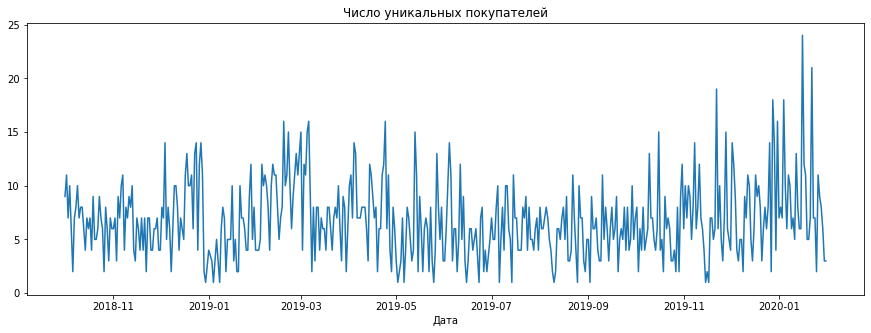

In [29]:
# выведем информацию на график
ax = ecom.groupby('date').agg({'customer_id':'nunique'}).plot(figsize=(15, 5), \
                                                              legend=False, title='Число уникальных покупателей')
ax.set_xlabel('Дата');

По графику видно, что в январе 2019 года была сильная просадка по числу уникальных пользователей. Скорее всего, повлияли новогодние каникулы (в декабре был пиковый рост, а потом на время каникул график рухнул вниз). 

С марта 2019 по ноябрь 2019 график относительно ровный и стабильный, хотя в мае-июне есть взлёты — скорее всего сезонный спрос (например, на дачные и строительные товары). Затем снова пиковый рост в ноябре и декабре — очевидно, перед Новым годом спрос у нас растёт.

Что характерно — в январе 2020 такой критичной просадки уже нет, спрос держится на  высоком уровне. Вероятно, изменилась маркетинговая политика или был подкорректирован ассортимент, что привлекло больше покупателей.

Посмотрим распределение уникальных покупателей по месяцам. Проверим нашу гипотезу о сезонности.

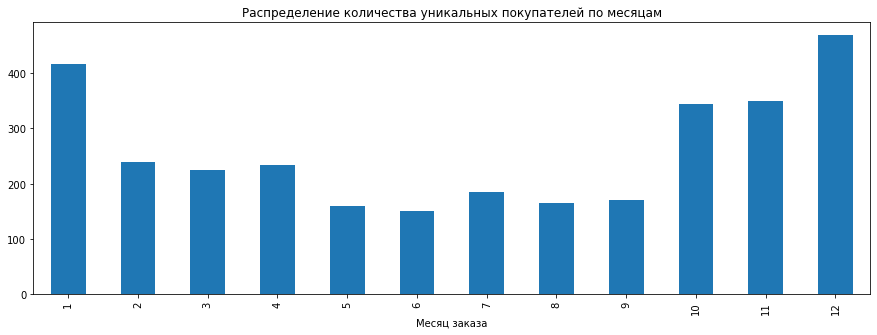

In [30]:
# выведем на график распределение числа уникальных пользователей по месяцам

ax = ecom.groupby('month').agg({'customer_id':'nunique'}).plot(kind='bar', figsize=(15, 5), legend=False, \
                                        title = 'Распределение количества уникальных покупателей по месяцам')
ax.set_xlabel('Месяц заказа');

Итак, мы действительно видим, что самый высокий спрос у нас в районе Нового года — декабрь и январь. Также пиковые значения в октябре-ноябре (это может быть та же подготовка к праздникам). Относительно высокий спрос наблюдается весной: с февраля по апрель — в это время обычно готовятся к лету, закупают товары для дачи и стройки. А вот с мая по сентябрь — "мёртвый сезон", в котором относительно нормальный спрос только в июле.

**Вывод: мы выяснили, что в нашей базе данных 2395 уникальных покупателя. Увидели, что максимальный спрос на товары с декабря по январь, повышенный — с октября по ноябрь. Худшее время — с мая по сентябрь. Чуть больше покупателей наблюдается с февраля по апрель. Из хороших новостей: в январе 2020 года просадки уже не было, в целом количество уникальных пользователей держится на высоком уровне и растёт (хотя на графике уже намечается февральская просадка).**

### Общее число заказов. Динамика числа заказов по дням <a id='countorders'></a>

Посмотрим динамику заказов по дням, посчитаем общее число заказов. Будем учитывать, что в нашей базе информация о транзакциях, которую предстоит объединить в заказы.

In [31]:
print ('Количество транзакций: ', ecom['order_id'].count())
print ('Количество заказов: ', ecom['order_id'].nunique())

Количество транзакций:  5450
Количество заказов:  3472


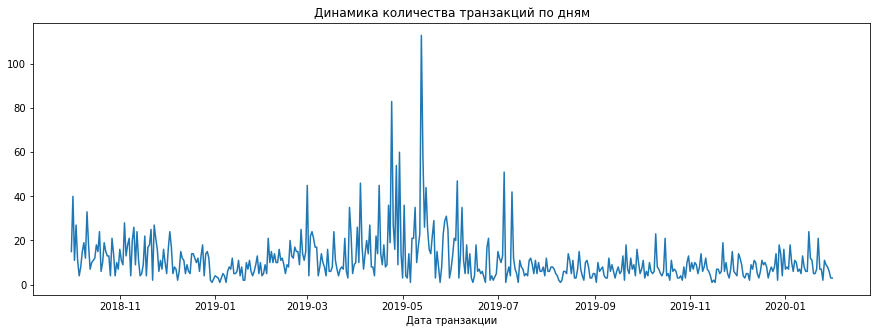

In [32]:
# выведем на график динамику количества транзакций по дням

ecom.groupby('date').agg({'order_id':'count'}).plot(figsize=(15, 5), legend=False)
plt.title('Динамика количества транзакций по дням')
plt.xlabel('Дата транзакции')
plt.show();

Снова видим тот же пик с марта по август 2019 года и падение числа транзакций после января 2019 года. Динамика повторяется. Посмотрим на динамику уникальных заказов.

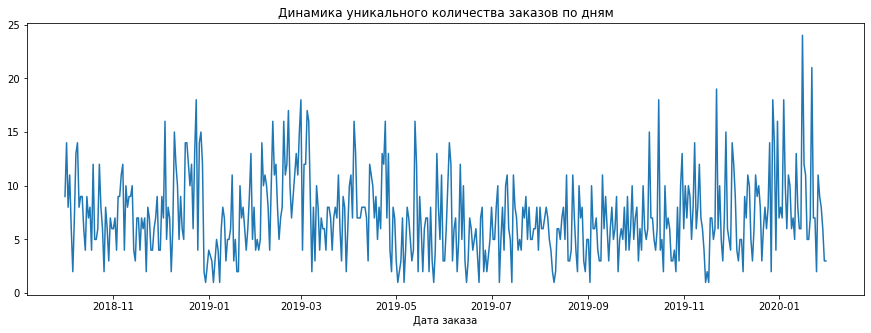

In [33]:
# выведем на график динамику уникальных заказов по дням

ecom.groupby('date').agg({'order_id':'nunique'}).plot(figsize=(15, 5), legend=False)
plt.title('Динамика уникального количества заказов по дням')
plt.xlabel('Дата заказа')
plt.show();

Пик в январе 2020 года, отличный рост в феврале-марте 2019 года и декабре 2018 года. С марта по октябрь 2019 число уникальных транзакций относительно стабильно.

Объединим информацию о заказах и транзакциях по месяцам, посмотрим сезонность.

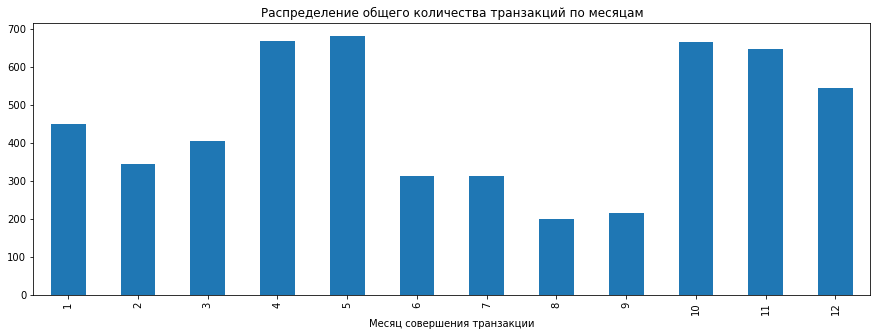

In [34]:
# посмотрим агрегированную информацию о транзакциях по месяцам

ecom.groupby('month').agg({'order_id':'count'}).plot(kind='bar', figsize=(15, 5), legend=False)
plt.title('Распределение общего количества транзакций по месяцам')
plt.xlabel('Месяц совершения транзакции')
plt.show();

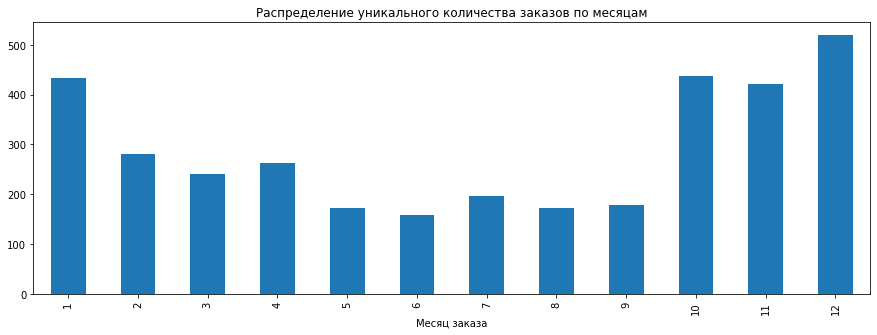

In [35]:
# посмотрим агрегированную информацию о заказах по месяцам

ecom.groupby('month').agg({'order_id':'nunique'}).plot(kind='bar', figsize=(15, 5), legend=False)
plt.title('Распределение уникального количества заказов по месяцам')
plt.xlabel('Месяц заказа')
plt.show();

Посмотрим, сколько заказов приходится на одного покупателя. Что с возвращаемостью людей.

In [36]:
# объединим информацию по пользователям, посчитаем заказы и их суммы

ecom.groupby('customer_id', as_index=False).agg({'order_id':'nunique', 'amount':'sum'})\
        .sort_values(by='order_id', ascending=False).head(2)

,customer_id,order_id,amount
1872,c971fb21-d54c-4134-938f-16b62ee86d3b,126,159508.0
722,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,57278.0


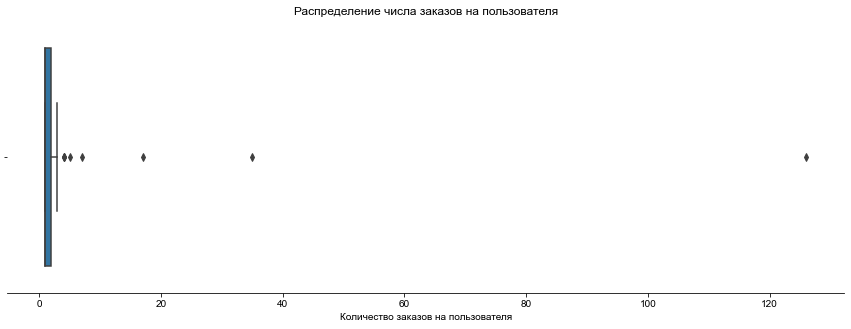

In [37]:
# выведем информацию на график

plt.figure(figsize=(15,5))
sns.boxplot(data=ecom.groupby('customer_id', as_index=False).agg({'order_id':'nunique'})\
        .sort_values(by='order_id', ascending=False), x='order_id')

plt.xlabel('Количество заказов на пользователя')
plt.title('Распределение числа заказов на пользователя')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

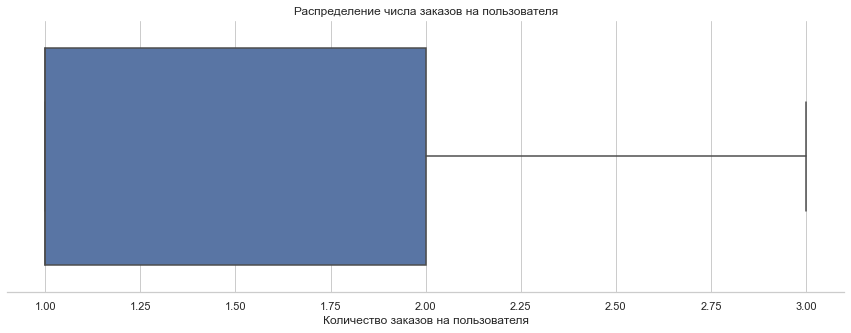

In [38]:
# без выбросов

plt.figure(figsize=(15,5))
sns.boxplot(data=ecom.groupby('customer_id', as_index=False).agg({'order_id':'nunique'})\
        .sort_values(by='order_id', ascending=False), x='order_id', showfliers=False)

plt.xlabel('Количество заказов на пользователя')
plt.title('Распределение числа заказов на пользователя')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

В среднем покупатель совершает 1-2 заказа, реже 3. Есть единичные истории, когда пользователь совершил более 100 заказов, но в основном все делают максимум 10 заказов.

In [39]:
# посчитаем, сколько выручки приходится на тех, кто совершает всего 1-2 заказа

print('Выручка от тех, кто купил 1-2 раза: ', round(ecom.groupby('customer_id', as_index=False)\
                                                    .agg({'order_id':'nunique', 'amount':'sum'})\
                                                    .query('order_id < 3')['amount'].sum(),2))
print('Выручка от тех, кто купил до трёх раз: ', round(ecom.groupby('customer_id', as_index=False)\
                                                    .agg({'order_id':'nunique', 'amount':'sum'})\
                                                    .query('order_id <= 3')['amount'].sum(),2))
print('Общая выручка: ', round(ecom['amount'].sum(),2)) 
print('Доля в общей выручке купивших один раз: ', round(ecom.groupby('customer_id', as_index=False)\
                                                    .agg({'order_id':'nunique', 'amount':'sum'})\
                                                    .query('order_id == 1')['amount'].sum()/ecom['amount'].sum()*100, 2))

Выручка от тех, кто купил 1-2 раза:  4194218.42
Выручка от тех, кто купил до трёх раз:  4252145.42
Общая выручка:  4546907.42
Доля в общей выручке купивших один раз:  58.38


**Мы проанализировали число заказов по датам и месяцам — информация коррелируется с данными о пользователях. Пиковые значения в октябре-январе, затем весной с февраля по апрель число заказов снижается. Самый "мёртвый" сезон — с мая по сентябрь включительно. При этом с апреля по май идёт пик транзакций, видимо за счёт повторных заказов. Что касается числа заказов на пользователя: это 1-2 заказа, реже 3.**

### Средняя сумма заказов. Динамика средней суммы заказов по дням  <a id='avsum'></a>

Посчитаем среднюю сумму заказов, посмотрим изменение показателя с течением времени. 

Мы помним, что в нашем датафрейме разные товары из одного заказа разнесены по разным строкам. Поэтому агрегируем информацию по номеру заказа, чтобы увидеть корректные цифры.

In [40]:
# объединим информацию по заказам, выведем общую сумму заказа и месяц, когда заказ был оформлен

group_by_orders = ecom.groupby('order_id').agg({'amount':'sum', 'month':'last'})
group_by_orders.head(2)

,amount,month
order_id,,
12624,375.0,6
13547,684.0,11


In [41]:
# посмотрим статистические данные по суммам заказа

group_by_orders['amount'].describe()

count      3472.000000
mean       1309.593150
std       11620.677217
min           9.000000
25%         194.000000
50%         577.000000
75%        1237.250000
max      675000.000000
Name: amount, dtype: float64

Минимальная сумма заказа — 9 рублей, максимальная — 675 000 рублей. Среднее значение — 1309 рублей, медианное — 577 рублей. В целом, у нас 3472 заказа в базе.

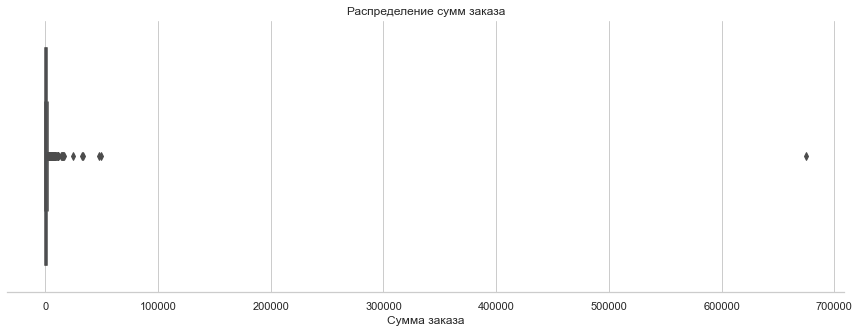

In [42]:
# посмотрим разброс сумм заказа на графике

plt.figure(figsize=(15,5))
sns.boxplot(data=group_by_orders, x='amount')

plt.xlabel('Сумма заказа')
plt.title('Распределение сумм заказа')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

Похоже, у нас есть аномальный заказ более 600 000 рублей, который сильно искажает статистику. Отбросим его.

In [43]:
# для начала посмотрим, сколько вообще заказов больше 50 000 рублей
group_by_orders.query('amount > 50000')

,amount,month
order_id,,
71743,675000.0,6


In [44]:
# найдём этот заказ по номеру и посмотрим что там

ecom.query('order_id == 71743')

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year
5456,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,675000.0,2019-06-18 15:00:00,2019-06-18,2,6,2019


Тысяча вантузов в одни руки. Едва ли это похоже на типичного клиента. Смело отбрасываем этот заказ.

In [45]:
# убираем этот заказ из базы данных (вместе со всеми транзакциями)

ecom = ecom[ecom.order_id != 71743]

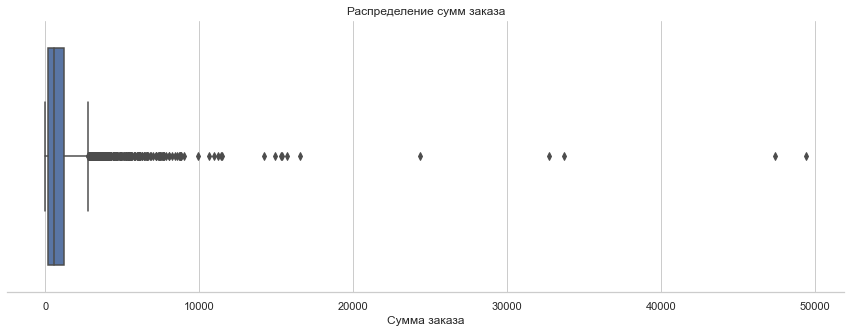

In [46]:
# и строим новый график

group_by_orders = ecom.groupby('order_id').agg({'amount':'sum', 'month':'last'})

plt.figure(figsize=(15,5))
sns.boxplot(data=group_by_orders, x='amount')

plt.xlabel('Сумма заказа')
plt.title('Распределение сумм заказа')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

По графику видно, что у нас ещё остались выбросы — заказы дороже 10 000 рублей. Посмотрим, сколько их, и по возможности отбросим.

In [47]:
# узнаем, сколько заказов попадёт в выбросы

group_by_orders.query('amount > 10000').nunique()

amount    16
month      8
dtype: int64

In [48]:
# всего 16 заказов. Выпишем номера этих заказов для удаления

group_by_orders.query('amount > 10000').index

Int64Index([ 14735,  68878,  69156,  69504,  69830,  69928,  70080,  70135,
             71204,  71205,  71206,  71478,  71598,  71668,  72139, 107812],
           dtype='int64', name='order_id')

In [49]:
# отбрасываем эти значения из базы данных
ecom = ecom.query('order_id != (14735,  68878,  69156,  69504,  69830,  69928,  70080,  70135, 71204,  71205,  71206,  71478,  71598,  71668,  72139, 107812)')

# и заново пересчитываем агрегированные данные
group_by_orders = ecom.groupby('order_id').agg({'amount':'sum', 'month':'last'})


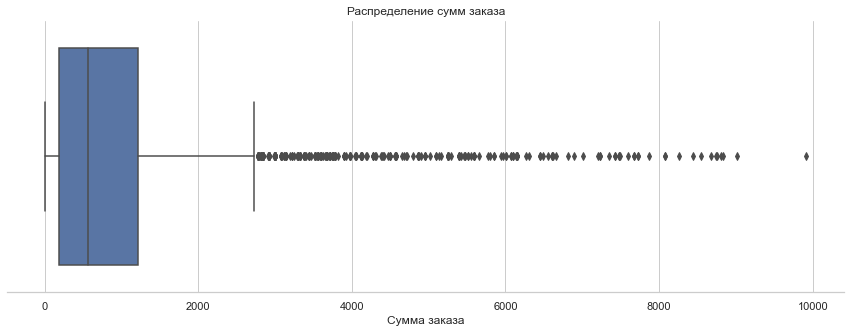

In [50]:
# посмотрим на обновлённый график

plt.figure(figsize=(15,5))
sns.boxplot(data=group_by_orders, x='amount')

plt.xlabel('Сумма заказа')
plt.title('Распределение сумм заказа')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

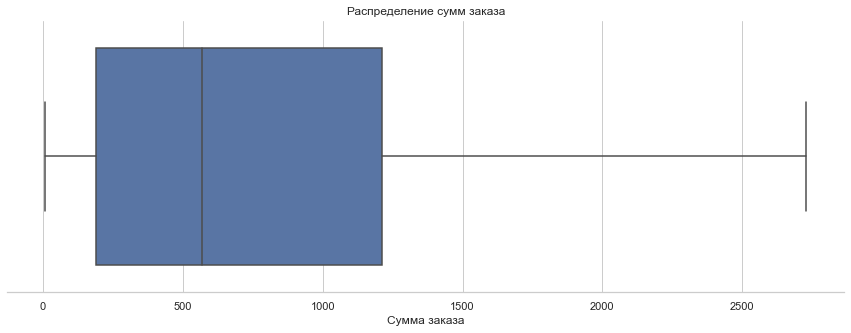

In [51]:
# посмотрим на график совсем без выбросов

plt.figure(figsize=(15,5))
sns.boxplot(data=group_by_orders, x='amount', showfliers=False)

plt.xlabel('Сумма заказа')
plt.title('Распределение сумм заказа')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

In [52]:
# обновим статистические данные

group_by_orders.describe()

,amount,month
count,3455.000000,3455.000000
mean,1023.609093,6.968162
std,1308.139113,3.951080
min,9.000000,1.000000
25%,189.000000,3.000000
50%,570.000000,7.000000
75%,1214.000000,11.000000
max,9915.000000,12.000000


Основная часть заказов находится в диапазоне 189-1214 рублей. При этом есть и выбросы до 9915 рублей.

Посмотрим, какая в среднем получается сумма заказов. Отобразим на графике, как распределяются суммы заказов в магазине — на какую сумму пользователи чаще набирают товары.

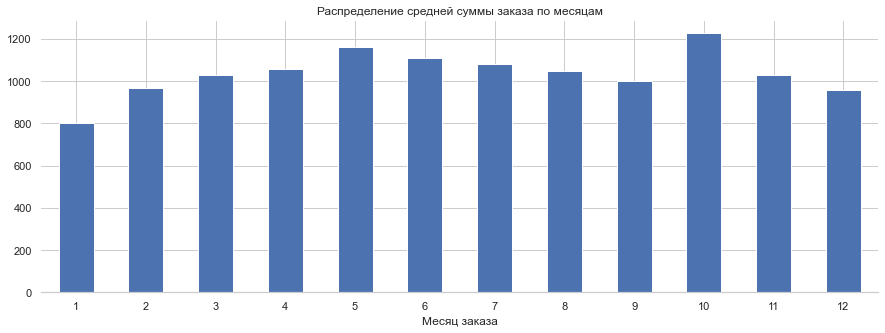

In [53]:
# посмотрим распределение средней суммы заказа по месяцам

group_by_orders.groupby('month').agg({'amount':'mean'}).plot(kind='bar', figsize=(15, 5), legend=False)
plt.title('Распределение средней суммы заказа по месяцам')
plt.xlabel('Месяц заказа')

sns.set(style='whitegrid')
sns.despine(left=True)
plt.xticks(rotation=0)

plt.show();

Средняя сумма заказов незначительно различается по месяцам: в октябре заказы дороже всего. С начала года и до мая идёт стабильный рост средней суммы заказов, а после мая она снижается вплоть до октябрьского пика. После октября средняя сумма заказа так же падает.

**Вывод: Основная часть заказов находится в диапазоне 189-1214 рублей. При этом есть и выбросы до 9915 рублей. При этом мы отбросили выбросы — экстремально дорогие заказы. Посмотрели динамику в течение года: средняя сумма заказа растёт с начала года и до мая, потом плавно снижается. В октябре — резкий рост стоимости заказа, который потом снижается до конца года.**

### Средний чек   <a id='avcheck'></a>

Посчитаем средний чек — поделим всю выручку от каждого пользователя на число его заказов. 

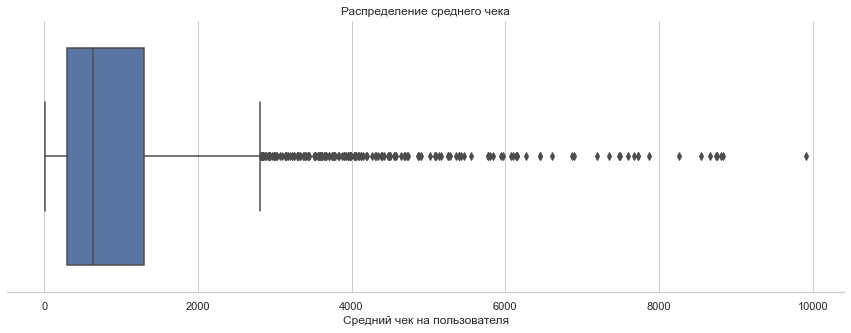

In [54]:
# посчитаем средний чек, объединив данные по заказам

av_check = ecom.groupby('customer_id', as_index=False).agg({'amount':'sum'})['amount']/ecom\
    .groupby('customer_id', as_index=False).agg({'order_id':'nunique'})['order_id']

# выведем информацию на график

plt.figure(figsize=(15,5))
sns.boxplot(data=av_check, x=av_check)

plt.xlabel('Средний чек на пользователя')
plt.title('Распределение среднего чека')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

Видно, что основная часть заказов находится в пределах 1500 рублей, максимум 2500-3000, далее идут выбросы вплоть до 10 000 рублей.

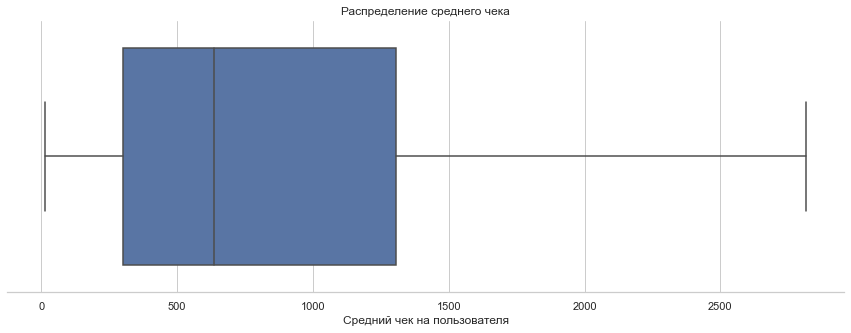

In [55]:
# посмотрим на график без выбросов

plt.figure(figsize=(15,5))
sns.boxplot(data=av_check, x=av_check, showfliers=False)

plt.xlabel('Средний чек на пользователя')
plt.title('Распределение среднего чека')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

In [56]:
# посчитаем статистические метрики

av_check.describe()

count    2384.00000
mean     1060.13517
std      1232.87894
min        15.00000
25%       300.00000
50%       637.12500
75%      1306.37500
max      9915.00000
dtype: float64

**Вывод: мы узнали, что средний чек на каждого пользователя в диапазоне 300-1306 рублей. При этом есть заказы от 15 рублей до 9915 рублей.**

### Сумма выкупа на каждого покупателя (LTV)   <a id='ltv'></a>

Посчитаем, на какую сумму пользователи набрали заказов — какая сумма их выкупа.

In [57]:
# посчитаем, на какую сумму всего транзакций на каждого пользователя

sum_by_users = ecom.groupby('customer_id', as_index = False).agg({'amount':'sum'})\
        .sort_values(by='amount', ascending = False)
sum_by_users.describe()

,amount
count,2384.000000
mean,1483.460326
std,3805.776255
min,15.000000
25%,389.000000
50%,830.000000
75%,1782.250000
max,159508.000000


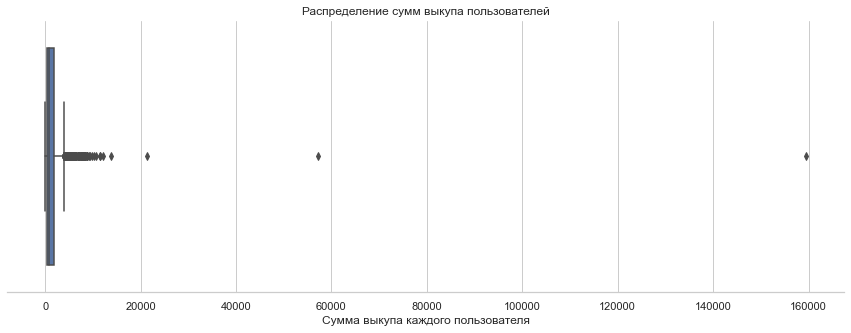

In [58]:
# отобразим информацию на графике

plt.figure(figsize=(15,5))
sns.boxplot(data=sum_by_users, x='amount')

plt.xlabel('Сумма выкупа каждого пользователя')
plt.title('Распределение сумм выкупа пользователей')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

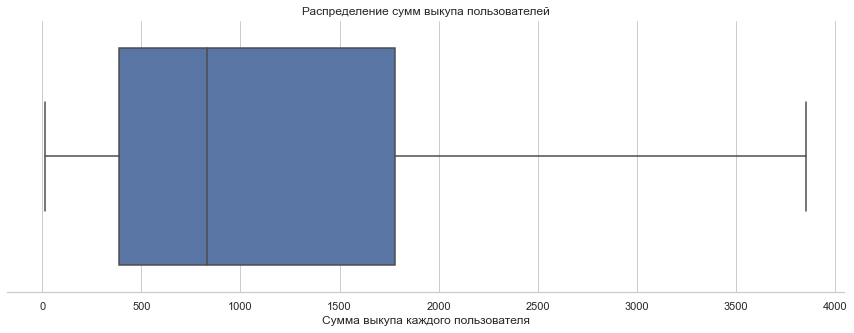

In [59]:
# без выбросов

plt.figure(figsize=(15,5))
sns.boxplot(data=sum_by_users, x='amount', showfliers=False)

plt.xlabel('Сумма выкупа каждого пользователя')
plt.title('Распределение сумм выкупа пользователей')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

**Вывод: мы посчитали сумму выкупа для каждого покупателя. Максимальный LTV — 159 508 рублей. В среднем суммы выкупа находятся в диапазоне 389-1782 рублей. Основная часть пользователей находится в диапазоне от 15 до 3805 рублей.**

### Категории товаров: по цене, количеству и частоте покупок   <a id='categorygoods'></a>

Разделим товары на категории, в зависимости от назначения товара, его цены и других параметров.

#### По количеству заказов <a id='#countoвrdersgoods'></a> 

Разобьём товары по тому, как много раз их заказывали. Для этого будем анализировать уникальные заказы. Разделим товары на хиты, популярные, востребованные, непопулярные.

In [60]:
# сгруппируем товары по уникальному числу транзакций

count_orders = ecom.groupby('product', as_index=False).agg({'order_id':'nunique'}).sort_values(by='order_id', ascending=False)
count_orders.head()

,product,order_id
1018,Пеларгония розебудная Red Pandora укорененный ...,65
1016,Пеларгония розебудная Prins Nikolai укорененны...,54
993,Пеларгония зональная диам. 12 см сиреневый пол...,52
1583,Сумка-тележка 2-х колесная Gimi Argo синяя,47
1015,Пеларгония розебудная Mary укорененный черенок,40


In [61]:
# посмотрим статистические показатели

count_orders.describe()

,order_id
count,2299.000000
mean,2.357547
std,3.395083
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,65.000000


In [62]:
# создадим функцию, которая пройдётся по заказам и "раздаст" категории товарам

def count_level(orders):
    if orders <= 1:
        return 'непопулярный'
    elif 2 <= orders <= 10:
        return 'востребованный'
    elif 11 <= orders <= 30:
        return 'популярный'
    elif orders > 30:
        return 'хит'

# применим функцию и создадим новый столбец с категорией

count_orders['count_level'] = count_orders['order_id'].apply(count_level)
count_orders.head(2)

,product,order_id,count_level
1018,Пеларгония розебудная Red Pandora укорененный ...,65,хит
1016,Пеларгония розебудная Prins Nikolai укорененны...,54,хит


In [63]:
# проверим, все ли товары получили категории

count_orders.isna().sum()

product        0
order_id       0
count_level    0
dtype: int64

In [64]:
# перенесём информацию в нашу основную таблицу

count_orders = count_orders.drop(['order_id'], axis=1)
ecom = pd.merge(ecom, count_orders, how='left', on=['product','product'])

ecom.head(2)

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year,count_level
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,2018-10-01,1,10,2018,востребованный
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,2018-10-01,1,10,2018,востребованный


In [65]:
# проверим, всё ли корректно перенеслось

ecom.isna().sum()

customer_id    0
order_id       0
product        0
quantity       0
price          0
amount         0
datetime       0
date           0
day            0
month          0
year           0
count_level    0
dtype: int64

In [66]:
# посмотрим, как товары распределились по категориям
ecom['count_level'].value_counts()

востребованный    3352
непопулярный      1197
популярный         554
хит                320
Name: count_level, dtype: int64

**Вывод: мы распределили товары по ценам на 4 категории, добавили соответствующий столбец в базу данных. Выяснили, что в основном у нас востребованные товары (3352 штуки), которые покупают от 2 до 10 раз. 1197 товаров купили всего единожды. Популярных (от 11 до 30 заказов) — 554 штуки, хитов (более 30 заказов) — 320 товаров. Максимум один и тот же товар покупали 65 раз.**

#### По ценам

Разобьём товары по категориям в зависимости от цены.

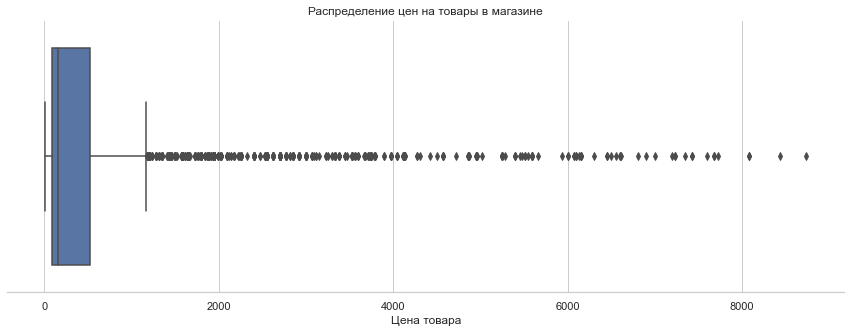

In [67]:
plt.figure(figsize=(15,5))
sns.boxplot(data=ecom, x='price')

plt.xlabel('Цена товара')
plt.title('Распределение цен на товары в магазине')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

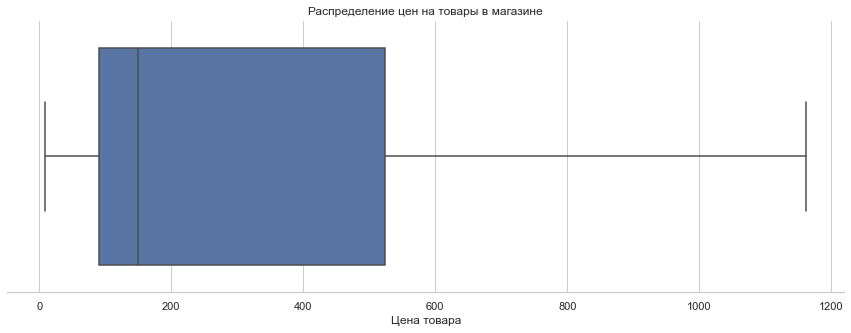

In [68]:
# без выбросов

plt.figure(figsize=(15,5))
sns.boxplot(data=ecom, x='price', showfliers=False)

plt.xlabel('Цена товара')
plt.title('Распределение цен на товары в магазине')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

In [69]:
ecom['price'].describe()

count    5423.000000
mean      525.925149
std       950.455784
min         9.000000
25%        90.000000
50%       150.000000
75%       524.000000
max      8737.000000
Name: price, dtype: float64

Минимальная цена товара — 9 рублей, максимальная — 8737 рублей. Медианное значение находится на уровне 150 рублей — это говорит о том, что у нас товары с доступными ценами, большинство товаров имеют низкую цену. Разобьём продукцию на категории по цене.

In [70]:
def price_level(price):
    if price <= 150:
        return 'дешёвый'
    elif 150 < price <= 524:
        return 'средний'
    elif 524 < price <= 944:
        return 'дорогой'
    elif price > 944:
        return 'очень дорогой'

# применим функцию к датафрейму — появится новый столбец с категорией    
ecom['price_level'] = ecom['price'].apply(price_level)

# посмотрим, сколько у нас товаров каждой категории
ecom.groupby('price_level', as_index=False).agg({'product':'nunique'}).sort_values(by='product', ascending = False)

,price_level,product
0,дешёвый,1058
3,средний,624
2,очень дорогой,437
1,дорогой,232


**Вывод: в основном в нашем магазине продаются доступные товары: 1058 товаров дешевле 150 рублей, 624 товаров до 524 рублей, 437 товаров до 944 рублей и 232 товаров дороже 944 рублей (до 8737 рублей). Самый дешёвый товар стоит всего 9 рублей, самый дорогой — 8737 рублей. Медианная цена товаров — 150 рублей, средняя — 524 рубля.**

#### По частоте покупок

Разделим товары на группы по частоте покупок: как часто совершаются заказы в течение всего периода наблюдения. Для этого поделим количество уникальных заказов на число календарных дней.

In [71]:
# посчитаем число заказов каждого продукта
group_goods = ecom.groupby('product', as_index = False).agg({'order_id':'nunique', 'amount':'sum'})
group_goods.head(2)

,product,order_id,amount
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,2,4798.0
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,1,2399.0


In [72]:
# в отдельном столбце - частота заказов (сколько заказов за общее число дней в базе данных)
group_goods['freq'] = group_goods['order_id']/ecom['date'].nunique()
group_goods.head(2)

,product,order_id,amount,freq
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,2,4798.0,0.004132
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,1,2399.0,0.002066


In [73]:
# изучим статистические показатели частоты заказов
group_goods['freq'].describe()

count    2299.000000
mean        0.004871
std         0.007015
min         0.002066
25%         0.002066
50%         0.002066
75%         0.006198
max         0.134298
Name: freq, dtype: float64

Все товары берут редко — медианная частота покупок находится на уровне 0.002. Однако есть небольшая группа товаров, которую покупают чаще других — их частота больше в 3 и более раз. Выделим эту категорию.

In [74]:
# создадим функцию для присваивания категорий по частоте заказов

def freq_rate(freq):
    if freq < 0.0021:
        return 'редко'
    elif 0.0021 <= freq <= 0.0070:
        return 'средне'
    elif freq > 0.0070:
        return 'очень часто'
        
# применим функцию к датафрейму — появится новый столбец с категорией    
group_goods['freq_rate'] = group_goods['freq'].apply(freq_rate)

In [75]:
group_goods.head(2)

,product,order_id,amount,freq,freq_rate
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,2,4798.0,0.004132,средне
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,1,2399.0,0.002066,редко


In [76]:
# перенесём наши категории в основную таблицу

ecom = pd.merge(ecom, group_goods.drop(['order_id', 'amount', 'freq'], axis=1), how='left', on=['product','product'])
ecom.head(2)

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year,count_level,price_level,freq_rate
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,2018-10-01,1,10,2018,востребованный,дешёвый,средне
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,2018-10-01,1,10,2018,востребованный,средний,средне


In [77]:
# проверим, всё ли корректно перенеслось - нет ли пропусков
ecom.isna().sum()

customer_id    0
order_id       0
product        0
quantity       0
price          0
amount         0
datetime       0
date           0
day            0
month          0
year           0
count_level    0
price_level    0
freq_rate      0
dtype: int64

In [78]:
ecom.groupby('freq_rate').agg({'product':'nunique'})

,product
freq_rate,
очень часто,338
редко,1196
средне,765


In [79]:
# посмотрим пример популярных товаров

ecom.query('freq_rate == "очень часто"').sort_values(by='freq_rate', ascending=False).head(5)

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year,count_level,price_level,freq_rate
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01 00:00:00,2018-10-01,1,10,2018,популярный,дешёвый,очень часто
3489,19940aa7-ded2-42f7-b75a-2247c4acbaae,71604,Сумка-тележка 2-х колесная складная Gimi Flexi...,1,1649.0,1649.0,2019-06-04 15:00:00,2019-06-04,2,6,2019,популярный,очень дорогой,очень часто
3480,579034b8-ab03-4077-b8c7-7a5e0289e412,71600,Пеларгония розебудная Prins Nikolai укорененны...,1,134.0,134.0,2019-06-04 11:00:00,2019-06-04,2,6,2019,хит,дешёвый,очень часто
3482,d2b12dec-4755-483b-b522-48cef83e4731,71595,Сушилка для белья настенная Zalger Prima 510-7...,1,299.0,299.0,2019-06-04 12:00:00,2019-06-04,2,6,2019,популярный,средний,очень часто
3484,695cbeda-4295-4b5e-9db9-6ac0adc5f1d7,14845,Однолетнее растение Петуния махровая в кассете...,20,82.0,1640.0,2019-06-04 15:00:00,2019-06-04,2,6,2019,популярный,дешёвый,очень часто


Цветы, сумка, хозтовары. Типичная история для нашего интернет-магазина.

**Вывод: мы проанализировали товары по частоте покупок. Выяснили, что большую часть товаров (1196) у нас берут редко, 765 товаров имеют средний спрос, и только 338 товаров покупают очень часто. Мы выделили рейтинг частоты покупок в отдельный столбец и перенесли его в основную таблицу.**


#### По назначению товара

Сделаем основной вид категоризации товаров - разделим их по назначению. 

Для начала нужно привести названия товаров к единому виду: сделать все буквы маленькими, убрать знаки и так далее. Затем мы выделим ключевые слова, по которым и будем делить товары на группы.

In [80]:
# приведём названия товаров к нижнему регистру
ecom['product_type'] = ((ecom['product'].str.lower())).str.strip()

# удалим из названий товаров символы, цифры, английские слова
ecom['product_type'] = ecom['product_type'].str.replace(r'[-<,\.\:\(\)\"/*\?\">=№\%0-9A-Za-z]+', '', regex=True).str.strip()

# удалим слова из менее чем трёх слов (обычно это сокращения единиц измерения)
ecom['product_type'] = ecom['product_type'].str.replace(r"\b\s+\w{1,3}\b", '', regex=True).str.strip()

# превратим строку в список и оставим только первые два слова (в них самая суть)
ecom['product_type'] = ecom['product_type'].str.split().str[:2].str.join(sep=" ")

# заменим ё на е
ecom['product_type'] = ecom['product_type'].replace('ё', 'е').replace('Ё', 'Е')

# посмотрим результат
ecom.head()

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year,count_level,price_level,freq_rate,product_type
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,2018-10-01,1,10,2018,востребованный,дешёвый,средне,комнатное растение
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,2018-10-01,1,10,2018,востребованный,средний,средне,комнатное растение
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,2018-10-01,1,10,2018,непопулярный,дешёвый,редко,радермахера
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10-01,2018-10-01,1,10,2018,востребованный,средний,средне,хризолидокарпус лутесценс
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,2018-10-01,1,10,2018,популярный,дешёвый,очень часто,циперус зумула


In [81]:
# выведем уникальные значения из нового столбца
ecom['product_type'].unique()

array(['комнатное растение', 'радермахера', 'хризолидокарпус лутесценс',
       'циперус зумула', 'шеффлера лузеана', 'юкка нитчатая',
       'настенная сушилка', 'таз пластмассовый', 'чехол гладильной',
       'вешалка брюк', 'сушилка белья', 'чехол хлопок', 'крючок одежный',
       'корзина мягкая', 'сумкатележка колесная', 'многолетнее растение',
       'рассада зелени', 'муляж райские', 'муляж банан', 'муляж виноград',
       'муляж гранат', 'муляж груша', 'муляж зеленое', 'муляж клубника',
       'муляж красное', 'муляж лимон', 'муляж мандарин', 'муляж перец',
       'муляж персики', 'муляж томат', 'муляж черешня',
       'щеткасметка рядная', 'сумка тележки', 'тарелка обеденная',
       'вилка столовая', 'ложка столовая', 'ложка чайная', 'нож столовый',
       'герань домашняя', 'ерш туалета', 'пеларгония зональная',
       'котел алюминиевый', 'суккулент микс', 'эхеверия перл',
       'доска гладильная', 'набор прищепок', 'коврик придверный',
       'коврик бежевый', 'корзина гл

In [82]:
#создадим словарь для разбивки ключей на категории

dictionary = {
    'растения': ['комнатное растение', 'радермахера', 'хризолидокарпус лутесценс', 'чабер', 'циперус зумула', 'шеффлера лузеана', 'юкка нитчатая', 'многолетнее растение', 'рассада зелени', 'герань домашняя', 'пеларгония зональная', 'суккулент микс', 'эхеверия перл', 'эвкалипт гунни', 'адиантум лиза', 'кампанула махровая', 'пеларгония душистая', 'калатея микс', 'нолина цветной', 'хлорофитум', 'цикламен', 'глоксиния', 'азалия индика', 'гортензия микс', 'хризантема космо', 'мирт', 'цветущее комнатное', 'кориандр кассете', 'иссоп лекарственный', 'сантолина', 'аспарагус', 'афеляндра скуарроса', 'антуриум андрианум', 'молодило микс', 'фиалка', 'гербера', 'душица обыкновенная', 'мелисса лекарственная', 'роза кордана', 'фиалка карнавал', 'хризантема белая', 'хризантема красная', 'бегония ампельная', 'рассада пеларгония', 'хризантема корейская', 'лаванда', 'мята', 'дендробиум санок', 'калоцефалус брауни', 'бархатцы веселая', 'космея очаровашка', 'морковь детская', 'настурция драгоценность', 'огурец засолочный', 'петуния каскад', 'алиссум лобулярия', 'гвоздика турецкая', 'годеция рембранд', 'календула пинк', 'капуста декоративная', 'кореопсис толл', 'космея клюквенный', 'космея кэнди', 'лапчатка огненное', 'львиный волшебный', 'флокс друммонда', 'цинерария серебряная', 'эшшольция карминный', 'диффенбахия топпером', 'гиностемма укорененный', 'ель канадская', 'кипарисовик лавсона', 'аптения', 'пуансеттия красная', 'пуансеттия белая', 'пуансеттия розовая', 'скиммия японская', 'цикламен цвет', 'фаленопсис люкс', 'гимнокалициум микс', 'аспарагус спренжери', 'тимьян', 'спатифиллум шопен', 'пеларгония розебудная', 'калатея кроката', 'фиалка малиновая', 'кофе арабика', 'эхеверия микс', 'спатифиллум', 'примула комнатная', 'дендробиум фиолетовый', 'калибрахоа ампельная', 'роза садовая', 'эпипремнум ауреум', 'фаленопсис желтый', 'аквилегия обыкновенная', 'базилик смесь', 'горох амброзия', 'земляника барон', 'незабудка смесь', 'седум почвопокровный', 'тимьян овощной', 'томат балконное', 'укроп обильнолистный', 'нефролепис бостон', 'калла крупноцветковая', 'декабрист горшке', 'дендробиум яблоневый', 'тюльпан лувр', 'гвоздика стандартная', 'газания рассада', 'овсянница сизая', 'георгина черная', 'календула бронзовая', 'космея лимонад', 'космея попсокс', 'космея снежный', 'смолевка звездный', 'цинния ацтек', 'цинния хаага', 'базилик зеленый', 'базилик овощной', 'базилик пурпурные', 'лаванда торх', 'лавр горшке', 'мята колосистая', 'тимьян крымский', 'вербейник монетчатый', 'виола рассада', 'гвоздика травянка', 'колокольчик персиколистный', 'котовник синий', 'львиный рассада', 'рассада остеоспермум', 'флокс растопыренный', 'эхинацея микс', 'ясколка войлочная', 'фиалка синяя', 'бегония вечноцветущая', 'рассада капусты', 'рассада перца', 'рассада тыквы', 'гвоздика садовая', 'петуния простая', 'петуния вейв', 'рассада огурец', 'вербена микс', 'пеларгония плющелистная', 'петуния светлосиреневая', 'петуния белая', 'фуксия синяя', 'фуксия белая', 'цитрофортунелла кумкват', 'пеперомия', 'гардения', 'бальзамин валера', 'томата помидор', 'земляника садовая', 'календула суприм', 'цинния коралловая', 'цинния оранжевый', 'базилик застольный', 'лобелия ампельная', 'настурция лунный', 'настурция орхидное', 'девичий виноград', 'петуния крупноцветковая', 'петуния оранжевая', 'петуния фиолетовобелая', 'петуния красная', 'вербена ампельная', 'лобелия регатта', 'петуния красные', 'тимьян горшке', 'эвкалипт сильвердроп', 'вербена крупноцветковая', 'вербена красная', 'петуния малиновобелая', 'мускари горшке', 'пиретрум робинсон', 'флокс метельчатый', 'алиссум рассада', 'лобелия рассада', 'петуния бургунди', 'петуния небесноголубой', 'петуния розовая', 'петуния виннобелая', 'тагетис крупноцветковый', 'агератум рассада', 'колеус рассада', 'цинерания рассада', 'муррайя', 'петуния рассада', 'аргирантерум рассада', 'левкой рассада', 'петуния свитуния', 'петуния сиреневая', 'петуния краснорозовая', 'петуния фиолетовая', 'вероника колосковая', 'целозия гребенчатая', 'капуста белокочанная', 'примула рассада', 'вербена яркорозовая', 'маттиола ночная', 'капуста брокколи', 'кориандр стимул', 'рассада кабачка', 'сальвия рассада', 'арбуз огонек', 'арбуз сибирские', 'арбуз холодок', 'арбуз шуга', 'баклажан самурай', 'дыня алтайская', 'дыня дина', 'дыня золотой', 'дыня колхозница', 'дыня медовый', 'дыня награда', 'клубника альба', 'клубника мара', 'клубника хоней', 'петуния синяя', 'патиссон диск', 'патиссон оранжевый', 'лук порей', 'петуния ампельная', 'джункус пенсил', 'рассада патиссона', 'драцена фрагранс', 'арбуз волгоградец', 'рассада кассете', 'фуксия ампельная', 'фатсия японская', 'хоста микс', 'рассада кабачок', 'капуста цветная', 'огурец алтай', 'огурец аристократ', 'огурец багратион', 'огурец боярский', 'томат государь', 'томат детерминантный', 'лапчатка травянистая', 'седум очиток', 'сциндапсус ассортименте', 'пеларгония тюльпановидная', 'аквилегия махровая', 'алиссум скальный', 'астра альпийская', 'бузульник пржевальского', 'камнеломка арендса', 'солидаго желтый', 'физостегия вергинская', 'гардения укорененный', 'капуста брюссельская', 'патиссон зонтик', 'патиссон белый', 'осина обыкновенная', 'молодило горшке', 'бадан сердцелистный', 'камнеломка тенистая', 'колокольчик карпатский', 'лен небесная', 'барвинок синий', 'вербена сиреневобелая', 'калибрахоа оранжевокрасная', 'анемона белый', 'буддлея вейера', 'валериана лекарственная', 'змееголовник молдавский', 'капуста кольраби', 'любисток удалец', 'монарда горшке', 'фатсия', 'петрушка корневая', 'петрушка листовая', 'сельдерей листовой', 'табак бордовый', 'табак курительный', 'фуксия кассете', 'шалфей овощной', 'табак душистый', 'шеффлера голд', 'ранункулус клуни', 'хлорофитум укорененный', 'фуксия прямостоячая', 'фуксия малиновая', 'пахира акватика', 'эхеверия лила', 'диффенбахия камилла', 'амариллис темнокрасный', 'роза чайногибридная', 'спатифиллум свит', 'клен ложноплатановый', 'пеларгония розоцветная', 'розмарин', 'примула желтая', 'гипсофила аврора', 'пуансеттия горшке', 'рассада огурца', 'рассада томата', 'цикламен комнатный', 'хризантема кустовая', 'мята перечная', 'гиацинт голубой', 'вербена рассада', 'однолетнее растение', 'петуния гибридная', 'петуния махровая', 'бакопа ампельная', 'калибрахоа сиреневая', 'калибрахоа фиолетовая', 'мята махито', 'калибрахоа красная', 'калибрахоа желтая', 'лаванда горшке', 'виола рогатая', 'лилейник высокорослый', 'папоротник страусник', 'платикодон махровый', 'энотера миссурийская', 'гортензия метельчатая', 'дыня млада', 'дыня симпатия', 'рассада арбуза', 'рассада дыни', 'рассада клубники', 'циния рассада', 'синнингия глоксиния', 'кореопсис золотой', 'портулак рассада', 'гайлардия крупноцветковая', 'монарда гибридная', 'нивянник ромашка', 'рудбекия тайгер', 'пряные травы', 'лаватера монт', 'вигна лилиана', 'кабачок изумруд', 'огурец закусочный', 'тыква крупноплодная', 'хамедорея', 'лантана горшке', 'цикламен розовый', 'зверобой продырявленный', 'фиалка махровая', 'замиокулькас', 'розмарин горшке', 'лавр', 'литопс микс', 'хризантема сиреневая', 'бальзамин новогвинейский', 'бегония клубневая', 'крассула овата', 'артемизия полынь', 'альбука спиралис', 'фиалка микс', 'каланхое каландива', 'примула акаулис', 'каллуна гарден', 'капсикум сальса', 'пеларгония топпером', 'роза патио', 'подсолнечник низкорослый', 'фиалка белая', 'пеларгония укорененный', 'антуриум тропик', 'эхинокактус грузони', 'крокусы голубой', 'калибрахоа желтокрасная', 'калибрахоа малиновая', 'калибрахоа розовосиреневая', 'петуния желтая', 'петуния черная', 'импатиенс гвинея', 'мединилла магнифика', 'лавр нобилис', 'лантана', 'соланум', 'мимоза стыдливая', 'петрушка итальянский', 'салат рукола', 'алоэ вера', 'роза одноголовая', 'фаленопсис королевский', 'крассула', 'пуансетия топпером', 'пеларгония грандифлора', 'роза мини', 'кодонанта укорененный', 'гербера комнатная', 'роза палас', 'астра рассада', 'рассада пряной', 'фиттония скелетон', 'фиалка химера', 'роза кустовая', 'фикус каучуконосный', 'цикламен белый', ],
    'хозтовары': ['настенная сушилка', 'таз пластмассовый', 'чехол гладильной', 'вешалка брюк', 'сушилка белья', 'чехол хлопок', 'крючок одежный', 'корзина мягкая', 'щеткасметка рядная', 'ерш туалета', 'доска гладильная', 'набор прищепок', 'корзина глаженного', 'корзина пластиковая', 'подкладка чехол', 'дозатор мыла', 'ёрш унитазный', 'мусорный контейнер', 'перчатки латексные', 'стремянка алюминиевая', 'гладильная доска', 'лестницастремянка оцинкованная', 'стяжка оконная', 'плечики пластмассовые', 'петля приварная', 'чехол металлизированый', 'вкладыши хранения', 'щетка смахивания', 'крепеж пружины', 'пружина дверная', 'кофр хранения', 'стремянки ступени', 'щетка посуды', 'щеткаутюжок ручкой', 'чехол одежды', 'чехол платья', 'подрукавник складной', 'набор сверел', 'сверлофреза нитрид', 'контейнер овощей', 'гладильная доскастремянка', 'карниз алюминиевый', 'веник сорго', 'лестницастремянка алюминевая', 'ерш унитаза', 'контейнер мусора', 'стремянка металлическая', 'швабра многофункциональная', 'ящик хранения', 'щетка палубная', 'ведро мусора', 'ножеточка универсальная', 'вешалкаплечики эссенции', 'настольная гладильная', 'стремянка бытовая', 'подрукавник гладильной', 'лестницастремянка примус', 'щеткасметка пластиковой', 'корыто оцинкованное', 'шнур резиновый', 'урна уличная', 'стремянка ступенчатая', 'емкость прямоугольная', 'насадкамоп хлопковая', 'сметка совком', 'измерительный алюминиевый', 'линейка длина', 'ложка обувная', 'насадка швабре', 'вешалка напольная', 'сиденье ванны', 'вешалкаперекладина металлическая', 'петлястрела рыбинск', 'вешалкастойка дерево', 'сиденье унитаза', 'подголовник ванной', 'набор вешалок', 'комплект ванной', 'держатель туалетной', 'пробка ванны', 'вешалки мягкие', 'губка спираль', 'перчатки резиновые', 'корзина белья', 'сушилка мульти', 'вешалка настенная', 'вешалка самоклеющая', 'кофр малый', 'ролик чистки', 'термометр окно', 'скребок окон', 'отжим ведра', 'вешалкастойка сакура', 'стремянка ступеней', 'ведро крышки', 'шпагат полипропиленовый', 'таз алюминиевый', 'вешалка блузок', 'вантуз деревянной', 'вешалка верхней', 'термометр уличный', 'ящик почтовый', 'швабра сальса', 'вешалкасушилка', 'шило пластмассовой', 'вешалка деревянная', 'ковш пластмассовый', 'ручкаскоба белая', 'сетка глажения', 'вешалка гардеробная', 'вешалка закругленными', 'сиденье гладильной', 'чехол костюма', 'вешалка ника', 'комплект мытья', 'щетка мытья', 'складная картонная', 'контейнер герметичный', 'швабра пола', 'совок щетка', 'лестницастремянка ступенчатая', 'насадкаотжим пластиковая', 'веревка полипропиленовая', 'мешок строительного', 'ведро пластиковое', 'тряпкодержатель металлическим', 'бельевые прищепки', 'сверло металлу', 'фиксаторшар хром', 'ведро ягод', 'окномойка пластмассовой', 'ёрш радиаторный', 'стремянка стальная', 'насадка валик', 'скребок клипсами', 'насадка мытья', 'сиденье ванну', 'модульная стеклянная', 'перчатки чистки', 'лестница стремянка', 'карниз ванной', 'крючок проволочный', 'мыльница пластмассовая', 'подголовник', 'защитный экран', 'многофункциональный инструмент', 'стремянкатабурет алюминиевая', 'петля рояльная', 'кольца штор', 'вантуз черный', 'вешалка металлическая', 'чехол металлизированной', 'фал капроновый', 'штанга ванной', 'ведро ртслрозр', 'сетка стирки', 'сушилка', 'насадка ведра', 'штангенциркуль пластмассовый', 'ведро овальное', 'набор прецизионных', 'корзина колесах', 'рукав гладильной', 'шнур хозяйственный', 'вешалка костюма', 'сушилка уличная', 'измерительный угольник', 'покрытие гладильной', 'вешалка слуга', 'набор инструментов', 'стремянка ступени', 'мешок деликатной', 'завертка форточная', 'перчатки латекса', 'стакан ванной', 'щетка универсальная', 'решетка вентиляционная', 'запасная насадка', 'щётка унитаза', 'перчатки специальная', 'уголок оконный', 'вакуумный пакет', 'корзина', 'тряпка кафеля', 'совок металический', 'совок золы', 'коробка хранения', 'чехол короткой', 'холодная сварка', 'основание пробки', 'стяжки чехла', 'ведро резинопластиковое', 'шпингалет белый', 'бак белья', 'щетка труднодоступных', 'вешалка надверная', 'швабра мытья', 'контейнер пцлм', 'окномойка алюминиевой', 'урнапепельница нержавеющей', 'веник подметания', 'щетка хозяйственная', 'сменная насадка', 'швабра хозяйственная', 'урнапепельница стали', 'стремянка &', 'насадкамоп синтетическая', 'бидон пластмассовый', 'искусственный лист', 'ванна оцинкованная', 'корзинка крышкой', 'лоток белый', 'стремянка класс', 'прищепки белья', 'ведро полимербыт', 'коробка перфорированная', ],
    'бытовая химия': ['стиральный биопорошок', 'чистящий крем', 'жидкое мыло', 'пена ванн', 'зубная паста', 'ополаскиватель посудомоечных', 'антижир россия', 'универсальное средство', 'бальзам мытья', 'средство мытья', 'гипоаллергенный концентрированный', 'отбеливатель пероксоль', 'паста зубная', 'средство удаления', 'бензин зажигалок', 'паста полировки', 'мыло ручной', 'кондиционер белья', 'средство быстрого', 'мыло жидкое', 'мылоскраб мочалкой', 'ароматизированное средство', 'антинакипин утюгов', 'сменный блок', 'защитная соль', 'увлажняющая маска', 'концентрат мытья', 'подарочный набор', 'набор &', 'искусственная композиция', ],
    'декор': ['муляж райские', 'муляж банан', 'муляж виноград', 'подвесное кашпо', 'муляж гранат', 'муляж груша', 'муляж зеленое', 'муляж клубника', 'муляж красное', 'муляж лимон', 'муляж мандарин', 'муляж перец', 'муляж персики', 'муляж томат', 'муляж черешня', 'муляж вишня', 'муляж персик', 'цветок искусственный', 'искусственный цветок', 'муляж апельсин', 'муляж яблоко', 'декоративная композиция', 'муляж тыквы', 'муляж ананас', 'муляж баклажан', 'муляж манго', 'муляж морковь', 'муляж оранжевое', 'муляж чеснок', 'ваза маскарад', 'муляж булка', 'муляж лайм', 'муляж долька', 'муляж хлеб', 'фоторамка фотографий', 'искусственная лиана', 'муляж желудь', 'новогоднее дерево', 'декоративная коробка', 'подставка цветов', 'ключница картина', 'коробка прямоугольная', ],
    'текстиль': ['простыня резинке', 'коврик придверный', 'коврик бежевый', 'коврик интерьерный', 'плед флисовый', 'скатерть династия', 'коврик хлопковый', 'ковер придверный', 'готовая скатерть', 'штора текстильная', 'набор ковров', 'подушка декоративная', 'полотенце кухонное', 'салфетка серая', 'коврик влаговпитывающий', 'штора ванной', 'ковёр придверный', 'коврик резиновый', 'штора встроенными', 'салфетка аметист', 'скатерть лувр', 'салфетка камушки', 'сервировочная салфетка', 'коврик противоскользящий', 'скатерть джулия', 'простынь вафельная', 'скатерть куэна', 'скатерть муза', 'скатерть овальная', 'скатерть азалия', 'скатерть прямоугольная', 'покрывало жаккард', 'двуспальное постельное', 'наматрасник хлопок', 'покрывало стеганый', 'скатерть жаклин', 'скатерть полиэфир', 'простыня двуспальная', 'ткань гигиенических', 'халат вафельный', 'полотенце махровое', 'салфетка махровая', 'коврик ванной', 'коврик коричневый', 'коврик ворсовый', 'коврик черный', 'простыня сатиновая', 'ткань окон', 'подушка цвет', 'одеяло пуховое', 'полотенце прессованное', 'кухонное полотенце', 'махровое полотенце', 'комплект постельного', 'скатерть сидней', 'комплект махровых', 'скатерть ажурная', 'скатерть арлет', 'одеяло микрофибра', 'коврик ванну', 'коврик туалета', 'нетканые салфетки', 'салфетка натур', 'скатерть прямоугольнаях', 'скатерть виниловая', 'скатерть беатрис', 'скатерть донна', 'скатерть круглая', 'скатерть лион', 'покрывало вельсофт', 'наволочка арктик', 'пододеяльник кармен_в', 'салфетка шоколад', 'салфетка стол', 'махровый халат', 'набор махровых', 'одеяло белое', 'ткань универсальная', 'наматрацник бархатный', ],
    'кухня': ['мантоварка алюминиевая','набор кухонных','тарелка обеденная', 'термокружка вакуумная', 'сито нержавеющей', 'мокружка зеленый', 'миска фазенда', 'вилка столовая', 'ложка столовая', 'ёрш бутылки', 'ложка чайная', 'нож столовый', 'сотейник алюминиевый', 'котел алюминиевый', 'чайник эмалированный', 'толкушка картофеля', 'нож чистки', 'набор кружек', 'набор фужеров', 'кувшин пластмассовый', 'банка стеклянной', 'противень прямоугольный', 'стеклянная крышка', 'мокружка голубой', 'минисковорода сердце', 'сковорода алюминиевая', 'нож тонкой', 'банка металлической', 'масленка коровка', 'салатник кутюр', 'тарелка десертная', 'тарелка суповая', 'сковорода эксперт', 'банка стеклянная', 'разделочная доска', 'скалка силиконовая', 'мантоваркапароварка нержавеющая', 'толкушка деревянная', 'форма выпечки', 'орехоколка', 'чайный набор', 'набор эмалированных', 'рыбочистка металлическая', 'овощеварка алюминиевая', 'терка нержавеющей', 'кружка лили', 'контейнер приготовления', 'кружка радуга', 'кружка ягода', 'стакан пластмассовый', 'столовая ложка', 'чайная ложка', 'салфетница металлическая', 'стакан низкий', 'овощечистка плавающим', 'измельчитель овощей', 'лоток холодца', 'салатник амори', 'салатник колорама', 'салатник рапсоди', 'салатник арти', 'салатник биантэ', 'кружка сердечки', 'набор бокалов', 'набор стаканов', 'кастрюля чугунная', 'салатник эмпилабль', 'кружка марли', 'блюдце утро', 'контейнер продуктов', 'чайник заварочный', 'мерный стакан', 'ложка кухонная', 'подставка яйца', 'кружка трубочкой', 'салатник карин', 'ёрш бутылочный', 'соковыжималка цитрусовых', 'терка сыра', 'половник пластик', 'шприц кондитерский', 'отделитель косточек', 'нож поварской', 'кастрюля алюминиевая', 'мокружка сталь', 'кружка минни', 'сахарница фарфоровая', 'чайник свистком', 'кружка дисней', 'столовый сапфир', 'соковарка нержавеющей', 'нож стейка', 'лопатка', 'лопатка прорезями', 'соковарка нержавеющей', 'нож стейка', 'лопатка', 'лопатка прорезями', 'соковарка алюминиевая', 'универсальный нержавеющей', 'хлебница пластмасовая', 'крышка оцинкованная', 'кастрюля круглая', 'кастрюля эмалированная', 'кружка мерная', 'термокружка красный', 'кружка бамбук', 'термокружка синий', 'термос стеклянной', 'доска разделочная', 'кружка нордик', 'рассекатель пламени', 'набор форм', 'жестяная банка', 'банка рондо', 'банка стекла', 'банка крышкой', 'кружка тачки', 'набор посуды', 'кухонные ножницы', 'набор ножей', 'нож кухонный', 'рыбочистка деревянной', 'кисточка силиконовая', 'скребок кондитерский', 'картофелемялка металлическая', 'салатник воларэ', 'нож мясорубки', 'набор столовых', 'бульонница мистигри', 'хлебница деревянная', 'нож овощей', 'термостакан', 'подставка ножей', 'нож универсальный', 'миска варенья', 'салатник поэма', 'салатник романтик', 'хлебница', 'салатник аспен', 'кувшин виктория', 'миска пластмассовая', 'фарфоровая кружка', 'контейнер полимербыт', 'кружка шэйдс', 'пресс чеснока', 'термостакан кофе', 'просеиватель муки', 'тортница', 'блюдо серия', 'коврик кухонный', 'термокружка яромир', 'венчик деревянной', 'термокружка забава', 'термос', 'столовый', 'емкость соуса', 'набор пикника', ],
    'сумки': ['сумкатележка колесная', 'сумка тележки', 'сумкатележка хозяйственная', 'тележка багажная', 'тележка хозяйственная', 'сумкатележка синий', 'сумкатележка красная', 'сумкатележка синяя', 'сумкатележка стальной', 'сумкатележка', 'сумка хозяйственная', ],
    'электроника и приборы': ['утюг электрический', 'миксер сероголубой', 'чайник электрический', 'весы электронные', 'миксер электрический', 'кипятильник электрический', 'фен дорожный', 'светильник настольный', 'весы напольные', 'электроштопор белый', 'миксер василиса', 'пылесос синий', 'утюг черный', 'весы настольные', 'пылесос красный', 'автоматическая щетка', ],
    'мебель': ['полки лондон', 'полки берлин', 'полки мадрид', 'полки токио', 'полки ньюйорк', 'полки барселона', 'полка обуви', 'полки белыйчёрный', 'полки торонто', 'полки торонто', 'полки италия', 'полки пекин', 'полки торонто', 'ручка мебельная', 'этажерка обуви', 'подставка обуви', 'комод эльфпласт', 'этажерка цветочная', 'пьезозажигалка мультиискрой', 'обувница квадро', 'стеллаж обуви', 'складной детский']
}

# переносы специально не стала делать, чтобы ячейка была более компактной

In [83]:
# напишем функцию для распределения категорий товара по назначению

def category_goods(keywords):
    for keys, item in dictionary.items():
        for values in item:
            if  values == keywords:
                return keys
    return 'без категории'

# применим эту функцию к основному датасету

ecom['category'] = ecom['product_type'].apply(category_goods)
ecom.head(2)

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year,count_level,price_level,freq_rate,product_type,category
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,2018-10-01,1,10,2018,востребованный,дешёвый,средне,комнатное растение,растения
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,2018-10-01,1,10,2018,востребованный,средний,средне,комнатное растение,растения


In [84]:
# посмотрим распределение товаров по категориям, 
# заодно проверим, остался ли кто-то без категории

ecom['category'].value_counts()

растения                 2690
хозтовары                1161
кухня                     383
сумки                     376
декор                     336
текстиль                  320
бытовая химия              70
мебель                     51
электроника и приборы      36
Name: category, dtype: int64

In [85]:
# удалим временный столбец с ключами, оставим только категорию

ecom.pop('product_type')

0              комнатное растение
1              комнатное растение
2                     радермахера
3       хризолидокарпус лутесценс
4                  циперус зумула
                  ...            
5418               томата помидор
5419             дендробиум санок
5420              подставка обуви
5421      тагетис крупноцветковый
5422               вешалка блузок
Name: product_type, Length: 5423, dtype: object

In [86]:
# посмотрим на результат

ecom.head(2)

,customer_id,order_id,product,quantity,price,amount,datetime,date,day,month,year,count_level,price_level,freq_rate,category
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,2018-10-01,1,10,2018,востребованный,дешёвый,средне,растения
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,2018-10-01,1,10,2018,востребованный,средний,средне,растения


**Мы разделили товары на категории по назначению товара: растения, хозтовары, кухня, сумки, декор, текстиль, бытовая химия, мебель и электроника. Увидели, что больше всего у нас цветов и рассады, а тех же хозтоваров в два раза меньше. При этом дорогих товаров (мебели и электроники) почти нет в ассортименте.**

### Среднее количество покупаемых товаров для каждой категории товара  <a id='avquantitycategory'></a> 

Посмотрим, сколько в среднем люди берут товаров в одном заказе.

In [87]:
# посмотрим статистические показатели количества товаров в заказе
group_orders['quantity'].describe()

count    3455.000000
mean        3.500145
std        10.512624
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       300.000000
Name: quantity, dtype: float64

In [88]:
# сгруппируем транзакции по категориям
category_trans = ecom.groupby(['category', 'order_id']).agg({'quantity':'sum'})
category_trans.head(2)

quantity
category      order_id          
бытовая химия 68642            2
              68682            2

In [89]:
category_trans.groupby('category').agg({'quantity':'mean'})

,quantity
category,
бытовая химия,2.365079
декор,7.927711
кухня,3.126126
мебель,1.235294
растения,3.845545
сумки,1.029491
текстиль,2.078947
хозтовары,3.609375
электроника и приборы,1.114286


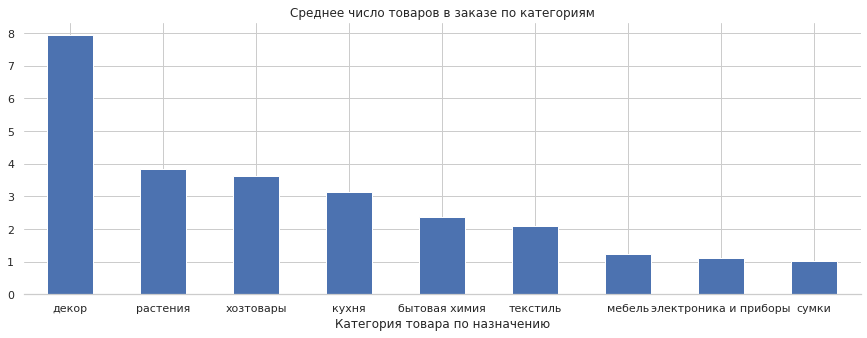

In [90]:
# посмотрим распределение средней суммы заказа по месяцам

category_trans.groupby('category').agg({'quantity':'mean'})\
    .sort_values(by='quantity', ascending=False).plot(kind='bar', figsize=(15, 5), legend=False)
plt.title('Среднее число товаров в заказе по категориям')
plt.xlabel('Категория товара по назначению')

sns.set(style='whitegrid')
sns.despine(left=True)
plt.xticks(rotation=0)

plt.show();

В среднем в каждом заказе бывает по 2-3 товара. Медианное значение — 1 товар. Максимум в одном товаре было 200 единиц товара.

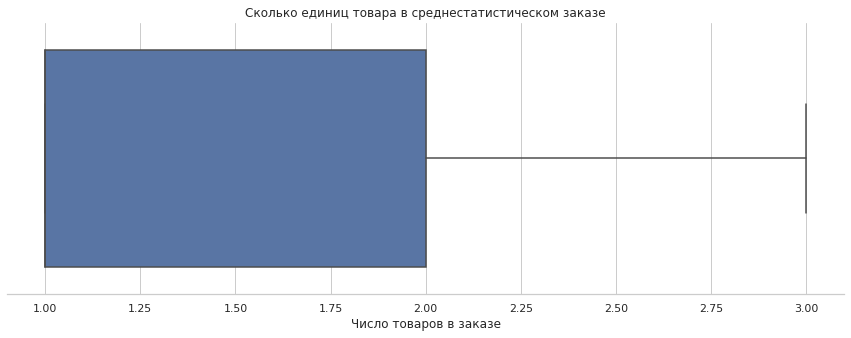

In [91]:
# покажем на графике, без выбросов

plt.figure(figsize=(15,5))
sns.boxplot(data=group_orders, x='quantity', showfliers=False)

plt.xlabel('Число товаров в заказе')
plt.title('Сколько единиц товара в среднестатистическом заказе')

sns.set(style='whitegrid')
sns.despine(left=True)

plt.show()

In [92]:
# посчитаем, сколько единиц товаров за раз берут в зависимости от вида товара
round(group_orders.groupby('category').agg({'quantity':'mean'}).sort_values(by='quantity', ascending=False),2)

,quantity
category,
декор,8.12
растения,3.86
хозтовары,3.65
кухня,3.10
бытовая химия,2.63
текстиль,2.13
электроника и приборы,2.00
мебель,1.24
сумки,1.06


Декор берут более массово: среднее число единиц в заказе достигает 8. А вот сумки берут по одной за раз, что логично. Растения берут по 3-4 штуки за заказ.

In [93]:
# посчитаем, сколько единиц товаров за раз берут в зависимости от цены товара
round(group_orders.groupby('price_level').agg({'quantity':'mean'}).sort_values(by='quantity', ascending=False),2)

,quantity
price_level,
дешёвый,6.57
средний,2.45
дорогой,1.33
очень дорогой,1.15


Всё логично: дешёвых продуктов набирают много, по 6-7 единиц товара, а вот очень дорогие и дорогие — всего по 1. 

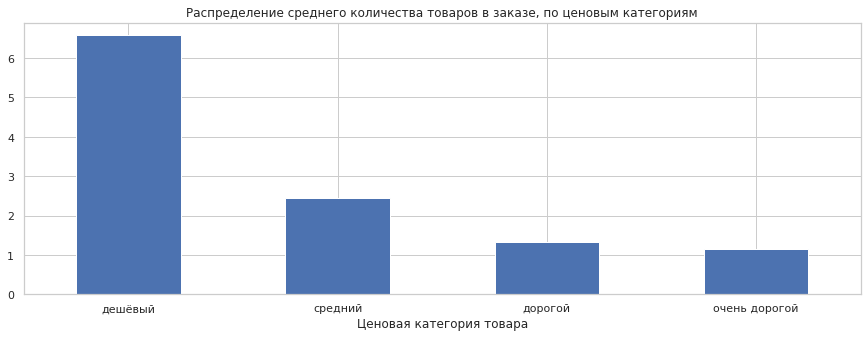

In [94]:
# построим график

group_orders.groupby('price_level').agg({'quantity':'mean'}).sort_values(by='quantity', ascending=False).plot(kind='bar', figsize=(15, 5), legend=False)
plt.title('Распределение среднего количества товаров в заказе, по ценовым категориям')
plt.xlabel('Ценовая категория товара')
plt.xticks(rotation=0)

plt.show();

**Мы посмотрели, как категории товаров влияют на то, сколько товаров в корзину добавляет клиент. Подтвердилась информация о том, что дешёвые товары берут помногу (6-7 единиц товара в заказе), а дорогие — штучно. Это косвенно подтверждается и тем, что декор покупают по 8 единиц в среднем, растения — по 4, а вот мебель и сумки — по одной. Хотя, например, электронику и приборы покупают по 2 единицы и это хороший знак, ведь по медианной сумме заказа эта категория тоже в лидерах. Ещё один повод развивать направление электроники в магазине.** 

### Топ-3 самых продаваемых категорий товаров  <a id='topcategory'></a> 

Посмотрим, какие категории товаров наиболее востребованы в нашем интернет-магазине. Будем смотреть распределение товаров по назначению.

In [95]:
# посмотрим лидеров по общей выручке

ecom.groupby('category', as_index=False).agg({'amount':'sum', \
                                            'order_id':'nunique', 'quantity':'sum'})\
                                            .sort_values(by='amount', ascending=False).head(3)

,category,amount,order_id,quantity
7,хозтовары,1.316273e+06,1088,3927
5,сумки,7.720072e+05,373,384
4,растения,5.080173e+05,1010,3884


In [96]:
# посмотрим лидеров по числу проданных единиц товара

ecom.groupby('category', as_index=False).agg({'amount':'sum', \
                                            'order_id':'nunique', 'quantity':'sum'})\
                                            .sort_values(by='quantity', ascending=False).head(3)

,category,amount,order_id,quantity
7,хозтовары,1.316273e+06,1088,3927
4,растения,5.080173e+05,1010,3884
1,декор,1.305387e+05,249,1974


In [97]:
# посмотрим лидеров по числу заказов

ecom.groupby('category', as_index=False).agg({'amount':'sum', \
                                            'order_id':'nunique', 'quantity':'sum'})\
                                            .sort_values(by='order_id', ascending=False).head(3)

,category,amount,order_id,quantity
7,хозтовары,1.316273e+06,1088,3927
4,растения,5.080173e+05,1010,3884
5,сумки,7.720072e+05,373,384


**Максимальный средний чек у сумок и мебели, самый низкий — у растений и декора. Сумки находятся в ТОП-3 по среднему чеку и общей выручке, хозтовары и растения — по выручке и количеству проданных единиц товара. Все три категории занимают топ-3 по числу заказов.**

## Сегментация пользователей на основе истории их покупок <a id='segmentation'></a> 

Приступим к главной задаче нашего исследования — сегментируем пользователей, чтобы настраивать на них максимально релевантную таргетированную рекламу. 

### RFM-анализ для сегментирования клиентов <a id='rfm'></a> 

Используем для сегментации клиентов метод RFM, который группирует клиентов на основе истории их транзакций. В основе метода лежат три критерия:
1. Recency, давность совершённой покупки
2. Frequency, частота покупок
3. Monetary Value, денежная ценность клиента (сколько потратил)

Cоздадим таблицу RFM.

In [98]:
# определим дату последнего заказа в датасете
ecom['date'].max()

datetime.date(2020, 1, 31)

In [99]:
# используем это значение для расчёта давности заказа
now = dt.datetime(2020,1,31)

# создадим RFM таблицу
rfm_table = ecom.groupby('customer_id').agg({'datetime': lambda x: (now - x.max()).days, # Recency
                                            'order_id': lambda x: len(x.unique()), # Frequency
                                            'amount': lambda x: x.sum()})    # Monetary 

rfm_table['datetime'] = rfm_table['datetime'].astype(int)

rfm_table.rename(columns={'datetime': 'recency', 
                         'order_id': 'frequency',
                         'amount': 'monetary_value'}, inplace=True)
rfm_table.head(2)

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,106,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,348,1,442.0


Теперь у нас есть значения RFM (давности, частоты и денежной ценности) для каждого пользователя.

In [100]:
# разобьём показатель RFM на квантили

quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,70.75,1.0,389.00
0.50,203.50,1.0,830.00
0.75,340.25,2.0,1782.25


In [101]:
# конвертируем квантили в словарь
quantiles = quantiles.to_dict()

# проведём сегментацию по RFM, сначала скопируем таблицу
rfm_segment = rfm_table.copy()

# зададим функцию для классификации по показателям Arguments 
# x = значение, p = давность / денежная ценность / частота, k = словарь квантилей

def r_class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# аргументы (x = значение, p = давность / денежная ценность / частота, k = словарь квантилей)
def fm_class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
rfm_segment['r_quartile'] = rfm_segment['recency'].apply(r_class, args=('recency',quantiles,))
rfm_segment['f_quartile'] = rfm_segment['frequency'].apply(fm_class, args=('frequency',quantiles,))
rfm_segment['m_quartile'] = rfm_segment['monetary_value'].apply(fm_class, args=('monetary_value',quantiles,))
rfm_segment['rfmclass'] = rfm_segment.r_quartile.map(str) \
                            + rfm_segment.f_quartile.map(str) \
                            + rfm_segment.m_quartile.map(str)

In [102]:
# посмотрим, кто наши лучшие клиенты - зададим максимальный параметр

rfm_segment[rfm_segment['rfmclass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfmclass
customer_id,,,,,,,


In [103]:
# идеальных нет, чуть понизим требования
rfm434 = rfm_segment[rfm_segment['rfmclass']=='434']\
    .sort_values('monetary_value', ascending=False)
rfm434.describe()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
count,194.000000,194.0,194.000000,194.0,194.0,194.0
mean,34.984536,2.0,3581.019759,4.0,3.0,4.0
std,20.423617,0.0,1897.435134,0.0,0.0,0.0
min,0.000000,2.0,1783.000000,4.0,3.0,4.0
25%,16.250000,2.0,2183.500000,4.0,3.0,4.0
50%,35.000000,2.0,3032.500000,4.0,3.0,4.0
75%,52.500000,2.0,4125.375000,4.0,3.0,4.0
max,70.000000,2.0,13731.000000,4.0,3.0,4.0


Мы получили список лучших клиентов. При этом максимальный балл по частоте покупок — 3. Нет ни одного пользователя с четвёркой.

Таких пользователей всего 194. Средняя частота заказа — 2. Средняя давность заказа — 35 дней, хотя есть покупатели от 0 до 70 дней. Сумма выкупа в среднем 3581 рубль, а вообще: от 1783 до 13731 рубля. 

**Лучшие клиенты сделали в среднем 2 заказа, последний из которых был около месяца назад, и совершили покупок на более чем 3500 рублей**.

In [104]:
# посмотрим список потерянных клиентов - с минимальным значением параметра

rfm_segment[rfm_segment['rfmclass']=='111'].sort_values('monetary_value', ascending=False).describe()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
count,149.000000,149.0,149.000000,149.0,149.0,149.0
mean,405.711409,1.0,219.395973,1.0,1.0,1.0
std,43.747324,0.0,108.118855,0.0,0.0,0.0
min,342.000000,1.0,15.000000,1.0,1.0,1.0
25%,367.000000,1.0,134.000000,1.0,1.0,1.0
50%,406.000000,1.0,224.000000,1.0,1.0,1.0
75%,439.000000,1.0,300.000000,1.0,1.0,1.0
max,485.000000,1.0,389.000000,1.0,1.0,1.0


Потерянных клиентов — 149. Совершают один заказ. Давность от 342 до 485 дней назад (примерно год и более). Сумма выкупа в среднем 219 рублей, а вообще от 15 до 389 рублей.

**Если клиент более года назад сделал заказ на сумму меньше 400 рублей и больше не вернулся — его можно считать для нас потерянным.**

In [105]:
# посмотрим клиентов, которые находятся на пороге оттока (давно заказывали)
rfm_segment[rfm_segment['r_quartile'] <= 2 ].sort_values('monetary_value', ascending=False).describe()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
count,1192.000000,1192.000000,1192.000000,1192.00000,1192.000000,1192.000000
mean,344.762584,1.242450,1446.358221,1.50000,1.194631,2.417785
std,80.469643,3.769484,5081.804471,0.50021,0.634077,1.108680
min,204.000000,1.000000,15.000000,1.00000,1.000000,1.000000
25%,280.000000,1.000000,374.000000,1.00000,1.000000,1.000000
50%,340.500000,1.000000,749.000000,1.50000,1.000000,2.000000
75%,414.000000,1.000000,1612.000000,2.00000,1.000000,3.000000
max,487.000000,126.000000,159508.000000,2.00000,4.000000,4.000000


Покупателей "на грани" — 1192 человека. В среднем эти люди сделали 1 заказ 344 дня назад (а вообще: от 204 до 487 дней назад). Сумма выкупа у них от 15 рублей до 159 508 рублей (в среднем 1446 рублей). 

Опасная тенденция: если покупатель сделал один заказ более полугода назад — он находится на грани ухода, независимо от суммы (даже если он уже успел потратить у нас 150 тысяч рублей.

**Мы провели RFM-анализ пользователей. Выделили три важных сегмента среди клиентов: потерянных, на грани и лучших. Узнали, что:**
- **лучшие клиенты сделали в среднем 2 заказа, последний из которых был около месяца назад, и совершили покупок на более чем 3500 рублей**
- **если покупатель сделал один заказ более полугода назад — он находится на грани ухода, независимо от суммы выкупа (даже если он уже успел потратить у нас 150 тысяч рублей**
- **если клиент более года назад сделал заказ на сумму меньше 400 рублей и больше не вернулся — его можно считать для нас потерянным**

## Проверка статистических гипотез  <a id='hypotheses'></a> 

Проверим следующие гипотезы:

1. **О равенстве средних суммарных выручек двух сегментов аудитории — идеальных клиентов и потерянных (RFM 434 и RFM 111).**

Нулевая гипотеза Н0: Статистически значимых различий в суммарных выручках у сегментов "RFM 434" и "RFM 111" нет. 
Альтернативная гипотеза Н1: Существуют статистически значимые различия в суммарной выручке между сегментами покупателей "RFM 434" и "RFM 111". 

2. **О равенстве средних суммарных выручки двух сегментов аудитории — frequency <= 2 и frequency > 2.**

Нулевая гипотеза Н0: Статистически значимых различий в суммарной выручке у сегментов "F <= 2" и "F > 2" нет. 
Альтернативная гипотеза Н1: Существуют статистически значимые различия в суммарной выручке у сегментов "F <= 2" и "F > 2".

**Для сравнения будем использовать t-test.**

**Для всех гипотез установим уровень статистической значимости alpha = 1%.**

Для начала нужно сформировать сегменты и подготовить выборки, с которыми и будем проводить тест.

In [106]:
# сформируем сегменты для первой гипотезы
customers_434 = rfm_segment[rfm_segment['rfmclass']=='434']\
    .sort_values('monetary_value', ascending=False).index

customers_111 = rfm_segment[rfm_segment['rfmclass']=='111']\
    .sort_values('monetary_value', ascending=False).index

# сделаем выборки
selection434 = ecom.query('customer_id in @customers_434')
selection111 = ecom.query('customer_id in @customers_111')

In [107]:
# посчитаем суммарную выручку в обеих выборках

total_revenue_434 = selection434.groupby('order_id', as_index=False).agg({'amount':'sum'})['amount']
total_revenue_111 = selection111.groupby('order_id', as_index=False).agg({'amount':'sum'})['amount']

Проверим первую гипотезу: о равенстве суммарных выручек у RFM-434 и RFM-111

In [108]:
alpha = 0.01 # уровень статистической значимости

results = st.ttest_ind(total_revenue_434, total_revenue_111)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве суммарных выручек у двух групп')
else:
    print('Не получилось отвергнуть нулевую гипотезу: есть значимые статистические различия') 

p-значение: 1.9337651854081588e-25
Отвергаем нулевую гипотезу о равенстве суммарных выручек у двух групп


**Мы получили подтверждение того, что средние выручки в сегментах лучших клиентов и утерянных клиентов не равны — имеют статистические различия. Это значит, что сегменты сфомированы правильно.**

In [109]:
# сформируем сегменты для второй гипотезы
customers_fless2 = rfm_segment[rfm_segment['f_quartile'] <= 2 ]\
                .sort_values('frequency', ascending=False).index

customers_fmore2 = rfm_segment[rfm_segment['f_quartile'] > 2 ]\
                .sort_values('frequency', ascending=False).index


# сделаем выборки
selection_fless2 = ecom.query('customer_id in @customers_fless2')
selection_fmore2 = ecom.query('customer_id in @customers_fmore2')

# посчитаем суммарную выручку в обеих выборках

total_revenue_fless2 = selection_fless2.groupby('order_id', as_index=False).agg({'amount':'sum'})['amount']
total_revenue_fmore2 = selection_fmore2.groupby('order_id', as_index=False).agg({'amount':'sum'})['amount']

Проверим вторую гипотезу: 

In [110]:
alpha = 0.01 # уровень статистической значимости

results = st.ttest_ind(total_revenue_fless2, total_revenue_fmore2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средних суммарной выручки у двух групп')
else:
    print('Не получилось отвергнуть нулевую гипотезу: есть значимые статистические различия') 

p-значение: 4.535511884550774e-09
Отвергаем нулевую гипотезу о равенстве средних суммарной выручки у двух групп


**Мы получили подтверждение того, что средние выручки в сегментах лучших клиентов и утерянных клиентов не равны — имеют статистические различия. Это значит, что сегменты сфомированы правильно.**

**Мы проверили две гипотезы о равенстве средних суммарных выручек по двум парам сегментов RFM. Убедились в том, что средние выручек в группах лучших и потерянных клиентов сильно разнятся, также как и у тех, кто покупают часто и покупают редко.**

## Общий вывод  <a id='generalconclusion'></a> 

На основе проведённого исследования мы узнали, что:

* С октября по январь — “высокий сезон”, максимум заказов в декабре. Наихудшая картина — с мая по сентябрь, особенно в июне. Средняя сумма заказов  растёт с января по май, затем падает и снова достигает максимального пика в октябре.


* Средний чек пользователей находится в диапазоне 300-1319 рублей (реже: от 15 рублей до 22 тысяч). Средняя сумма заказов, как правило, 194-1274 рублей, реже 3-50 тысяч. 


* Дешёвые товары берут помногу (6-7 единиц товара в заказе), а дорогие — штучно. Объём заказа зависит и от категории товара: декор покупают по 8 единиц в среднем, растения — по 4, а вот мебель и сумки — по одной. 


* В среднем один покупатель совершает 1-2 заказа, реже — 3, а 58.38% от общей выручки мы получаем от людей, которые купили всего один раз.


* В топ-3 по среднему чеку, выручке и количеству проданных единиц товара находятся сумки, хозтовары и растения.


* Среди наших покупателей: 2874 розничных, 361 мелкооптовых, 192 оптовых и 28 крупных оптовиков (покупают за раз более 50 единиц продукции). Оптовые и крупнооптовые покупатели генерируют 13% выручки, а розничные — 76%.

Также мы провели RFM-анализ и распределили пользователей на сегменты по ключевым параметрам: давность заказа, частота заказов и денежная ценность. В дальнейшем мы можем использовать эти сегменты для более глубокого анализа потребительского поведения и сборки узких выборок для показа таргетированной рекламы.


**Рекомендации:**

* Сезонность. Стоит запускать рекламу накануне сезона и догонять рекламой после окончания сезона. Горящие акции, распродажи, ликвидации и программы лояльности помогут решить эту задачу. В межсезонье можно запустить кампании по привлечению и подогреву аудитории.


* Средний чек и объём заказов. Средний чек в магазине очень низкий. Необходимо стимулировать крупные покупки: предлагать специальные условия (бесплатная доставка, бонусы, повышенные баллы). Пригодятся акции категорий “вместе дешевле” и “2 по цене 1”.


* Возвращаемость. Следует стимулировать пользователей на повторные покупки. Например, догревать их рекламой со сгорающим предложением за сделанный заказ. Также стоит обратить внимание на качество обслуживания, сервис.


* Лидеры продаж. Следует развивать категории хозтоваров, сумок и растений, расширять ассортимент в сторону товаров, которые будут продаваться в “мёртвый сезон” (например, комнатные растения и горшки к ним, хозяйственные сумки и чемоданы).


* Опт и розница. Количество оптовых покупателей крайне мало. Имеет смысл предусмотреть для них особую программу лояльности и сервис.  


======= Конец =======

In [111]:
# выгрузим данные для оформления дашборда

#ecom_tableau = ecom.groupby('order_id', as_index=False).agg({'amount':'sum', 'date':'last'})
#ecom_tableau.to_csv('ecom_tableau.csv', index=False)